<a href="https://colab.research.google.com/github/Akramkhan01/Appliances-Energy-Prediction-Capstone-Project/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data-driven prediction of energy use of appliances**
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

date time year-month-day hour:minute:second
Appliances, energy use in Wh (Dependent variable)
lights, energy use of light fixtures in the house in Wh (Drop this column)

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius RH2,
Humidity in living room area, in %

T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in % T4, Temperature in office room, in Celsius RH4,
Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius

RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius RH8,
Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in
Celsius Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from
Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station
(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,
rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of
weather data.

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Appliances Energy Prediction/'
df = pd.read_csv(file_path+'data_application_energy.csv')

In [4]:
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.head()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0  2016-01-11 17:00:00          60      30  ...        5.3  13.275433  13.275433
1  2016-01-11 17:10:00          60      30  ...        5.2  18.606195  18.606195
2  2016-01-11 17:20:00          50      30  ...        5.1  28.642668  28.642668
3  2016-01-11 17:30:00          50      40  ...        5.0  45.410389  45.410389
4  2016-01-11 17:40:00          60      40  ...        4.9  10.084097  10.084097

[5 rows x 29 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
# Check for null values

df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

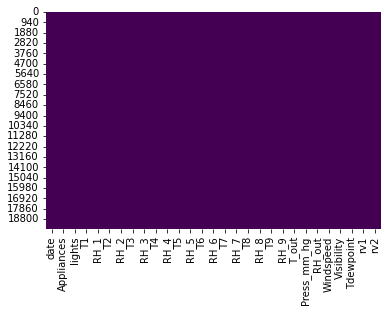

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [9]:
## Lets go and see the percentage of missing values
df.isnull().mean()

date           0.0
Appliances     0.0
lights         0.0
T1             0.0
RH_1           0.0
T2             0.0
RH_2           0.0
T3             0.0
RH_3           0.0
T4             0.0
RH_4           0.0
T5             0.0
RH_5           0.0
T6             0.0
RH_6           0.0
T7             0.0
RH_7           0.0
T8             0.0
RH_8           0.0
T9             0.0
RH_9           0.0
T_out          0.0
Press_mm_hg    0.0
RH_out         0.0
Windspeed      0.0
Visibility     0.0
Tdewpoint      0.0
rv1            0.0
rv2            0.0
dtype: float64

In [10]:
# Check for duplicates

duplicate_df = df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [date, Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []

# We have no null values and duplicate records.

In [11]:
df.describe()

Appliances        lights  ...           rv1           rv2
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      97.694958      3.801875  ...     24.988033     24.988033
std      102.524891      7.935988  ...     14.496634     14.496634
min       10.000000      0.000000  ...      0.005322      0.005322
25%       50.000000      0.000000  ...     12.497889     12.497889
50%       60.000000      0.000000  ...     24.897653     24.897653
75%      100.000000      0.000000  ...     37.583769     37.583769
max     1080.000000     70.000000  ...     49.996530     49.996530

[8 rows x 28 columns]

In [12]:
temp_dict = {
    'T1' : 'temp_kitchen', 'T2' : 'temp_living', 'T3' : 'temp_laundry', 
    'T4' : 'temp_office', 'T5' : 'temp_bath', 'T6' : 'temp_outside',
    'T7' : 'temp_iron', 'T8' : 'temp_teen', 'T9' : 'temp_parents', 'T_out' : 'temp_station'
}


In [13]:
energy_df = df.rename(columns=temp_dict)

In [14]:
humid_dict = {
    'RH_1' : 'humid_kitchen', 'RH_2' : 'humid_living', 'RH_3' : 'humid_laundry', 
    'RH_4' : 'humid_office', 'RH_5' : 'humid_bath', 'RH_6' : 'humid_outside',
    'RH_7' : 'humid_iron', 'RH_8' : 'humid_teen', 'RH_9' : 'humid_parents', 'RH_out' : 'humid_station'
}

In [15]:
energy_df = energy_df.rename(columns=humid_dict)

In [16]:
energy_df[temp_dict.values()].describe()

temp_kitchen   temp_living  ...  temp_parents  temp_station
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      21.686571     20.341219  ...     19.485828      7.411665
std        1.606066      2.192974  ...      2.014712      5.317409
min       16.790000     16.100000  ...     14.890000     -5.000000
25%       20.760000     18.790000  ...     18.000000      3.666667
50%       21.600000     20.000000  ...     19.390000      6.916667
75%       22.600000     21.500000  ...     20.600000     10.408333
max       26.260000     29.856667  ...     24.500000     26.100000

[8 rows x 10 columns]

In [17]:
energy_df[humid_dict.values()].describe()

humid_kitchen  humid_living  ...  humid_parents  humid_station
count   19735.000000  19735.000000  ...   19735.000000   19735.000000
mean       40.259739     40.420420  ...      41.552401      79.750418
std         3.979299      4.069813  ...       4.151497      14.901088
min        27.023333     20.463333  ...      29.166667      24.000000
25%        37.333333     37.900000  ...      38.500000      70.333333
50%        39.656667     40.500000  ...      40.900000      83.666667
75%        43.066667     43.260000  ...      44.338095      91.666667
max        63.360000     56.026667  ...      53.326667     100.000000

[8 rows x 10 columns]

In [18]:
weather_cols = list(set(energy_df.columns) - set(list(temp_dict.values())) - set(list(humid_dict.values())) - {'Appliances', 'lights', 'rv1', 'rv2'})
weather_cols

['date', 'Visibility', 'Tdewpoint', 'Windspeed', 'Press_mm_hg']

# **Exploratory Data Analysis**

# Dependent Variable - Appliances

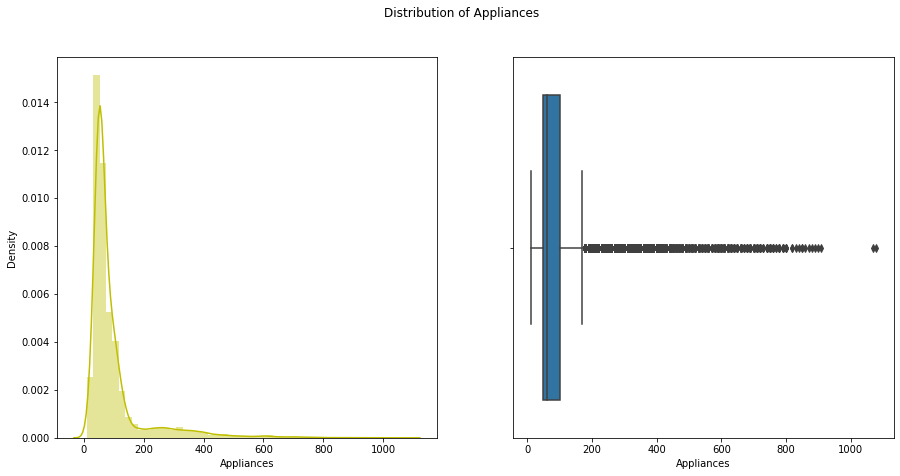

In [19]:
f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.distplot(df['Appliances'], hist=True, ax=axes[0],color="y")
sns.boxplot(data=df, x='Appliances', ax=axes[1])

plt.show()

# Distribution is highly right skewed. Also, we can see there are outliers.

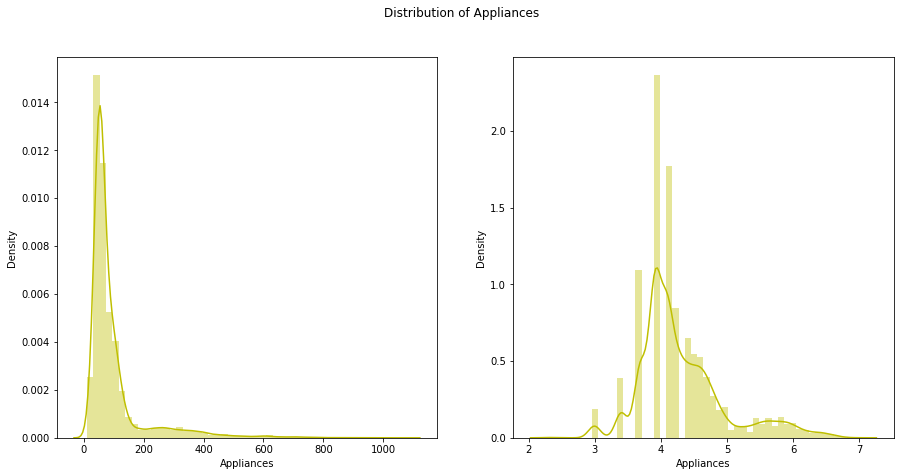

In [20]:
# Using log transformation to treat the skewness

f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.distplot(df['Appliances'], hist=True, ax=axes[0],color='y')
sns.distplot(np.log(df['Appliances']), hist=True, ax=axes[1],color='y')

plt.show()

# **Lights**

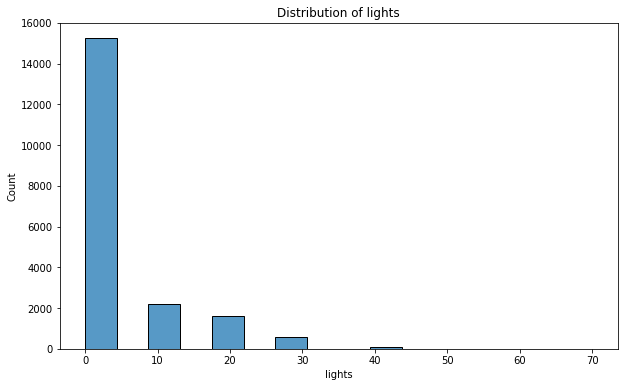

In [21]:
plt.figure(figsize = (10,6))
sns.histplot(data=df, x='lights')
plt.title(f'Distribution of lights')
plt.show()

In [22]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

## Light column has 15252 entires with value = 0. It could mean there is no human presence in that room at that time; or it could be during the day where  lights are not turned on; or it could be during the night when lights are  turned off. 

In [23]:
energy_df = energy_df.drop('lights', axis=1)

# **Energy consumption**
### **Energy Consumption pattern of the household at different times of the day over different time periods**

In [24]:
energy_df['weekday'] = ((pd.to_datetime(energy_df['date']).dt.dayofweek)// 5 == 0).astype(int)
energy_df['hour'] = pd.to_datetime(energy_df['date']).dt.hour
energy_df['month'] = pd.to_datetime(energy_df['date']).dt.month

Text(0, 0.5, 'Appliance energy (Wh)')

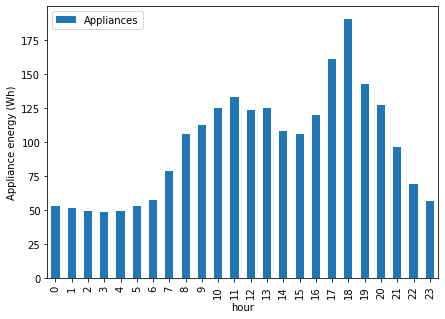

In [25]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
energy_df.groupby('hour').agg({'Appliances' : 'mean'}).plot.bar(ax=ax)
ax.set_ylabel('Appliance energy (Wh)')

# **What about weekdays and weekends?**

Text(0, 0.5, 'Appliance Energy (Wh)')

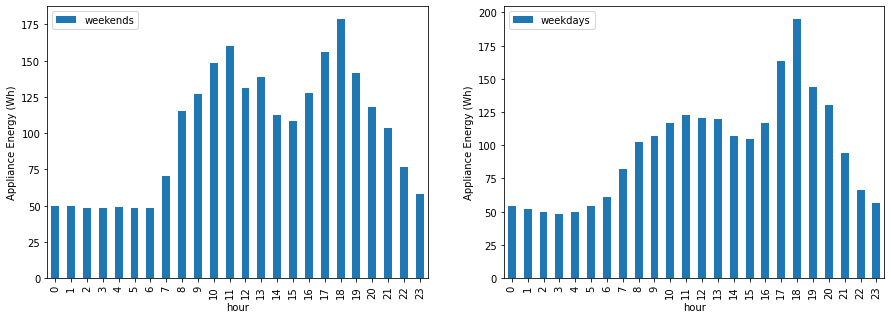

In [26]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
week_df = energy_df.groupby(['weekday','hour']).agg({'Appliances':'mean'}).reset_index(0)
week_df[week_df.weekday==0].Appliances.plot.bar(ax=ax[0], label='weekends')
week_df[week_df.weekday==1].Appliances.plot.bar(ax=ax[1], label='weekdays')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].set_ylabel('Appliance Energy (Wh)')
ax[1].set_ylabel('Appliance Energy (Wh)')

In [27]:
energy_df[['temp_outside', 'humid_outside']].corr()

temp_outside  humid_outside
temp_outside       1.000000      -0.672137
humid_outside     -0.672137       1.000000

# Indeed there is a strong negative correlation between temperature and humidity levels outside. As temperature increases, moisture levels in the air decreases. We also observe that during the day time when the temperatures are high, humidity levels are low.

# Lets look at correlation matrix of temperature and humidity levels

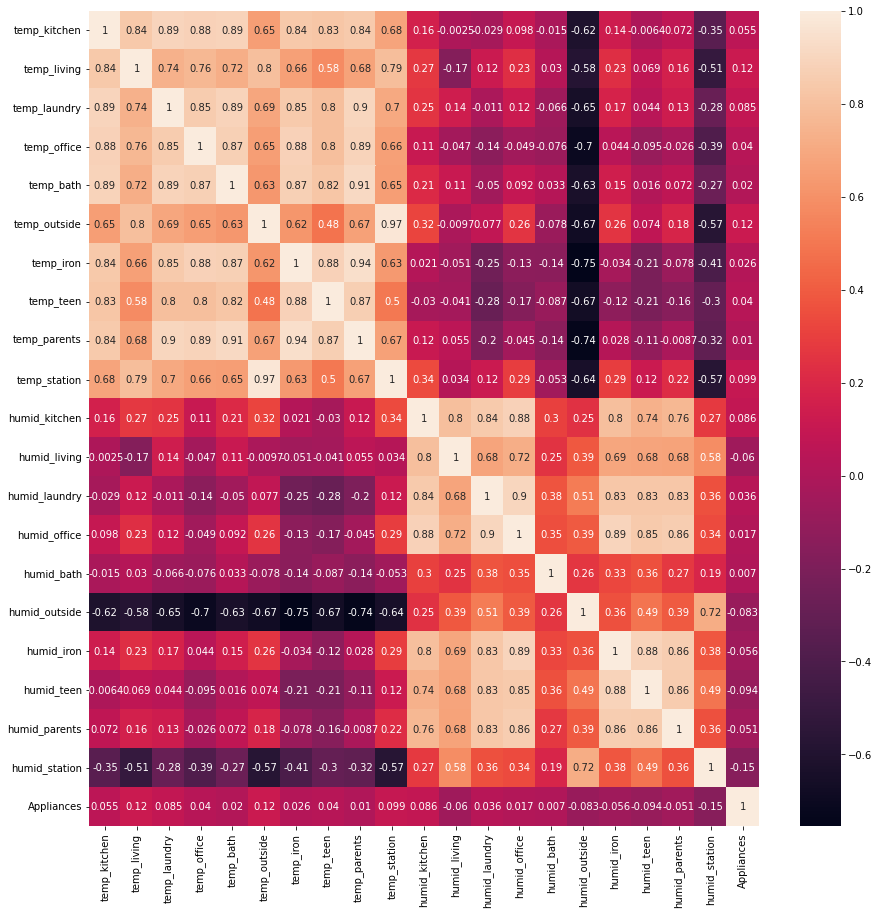

In [28]:
cols = list(temp_dict.values())
cols.extend(list(humid_dict.values()))
cols.extend(['Appliances'])
fig, ax = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(energy_df[cols].corr(), ax=ax, annot=True)

# Lets look at the dependence of appliance energy consumption on newly created variables !

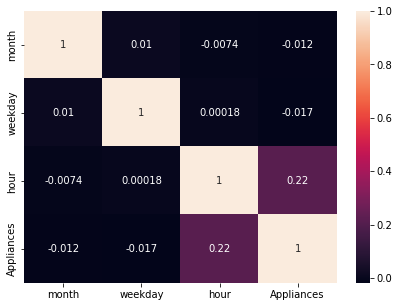

In [29]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
sns.heatmap(energy_df[['month', 'weekday', 'hour', 'Appliances']].corr(), annot=True, ax=ax)

# Numeric Feature Univariate Analysis using Histogram

In [30]:
numeric_features = df.describe().columns
numeric_features

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [31]:
len(numeric_features)

28

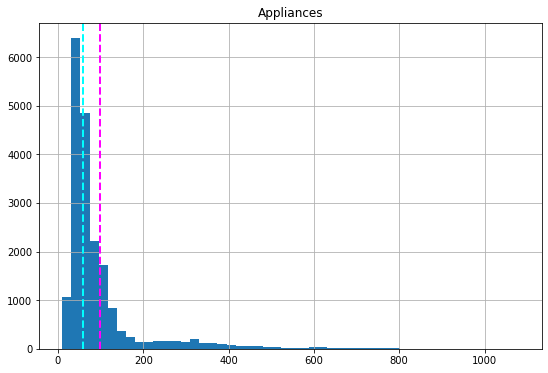

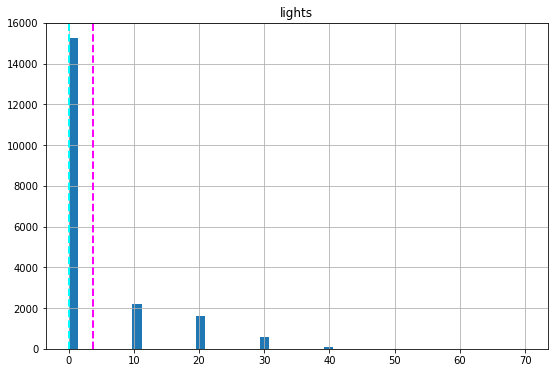

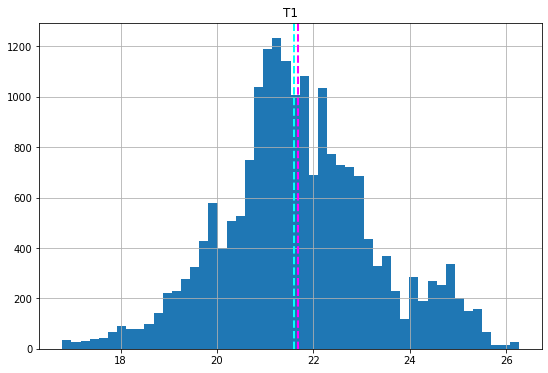

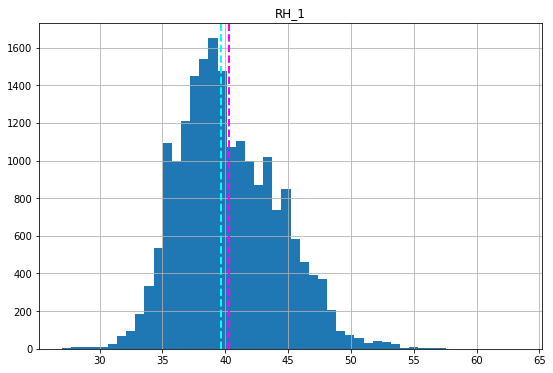

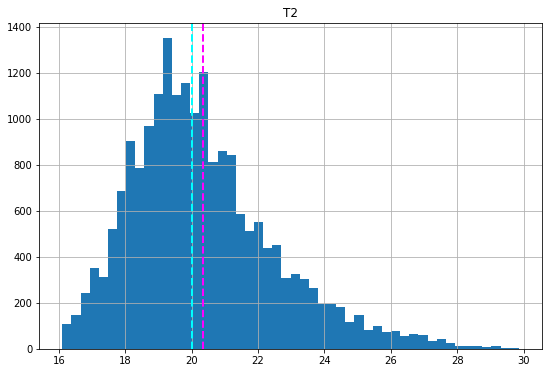

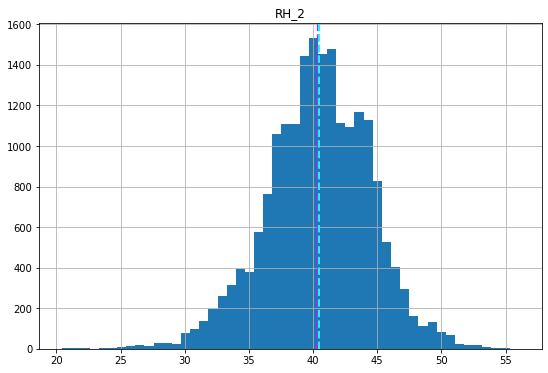

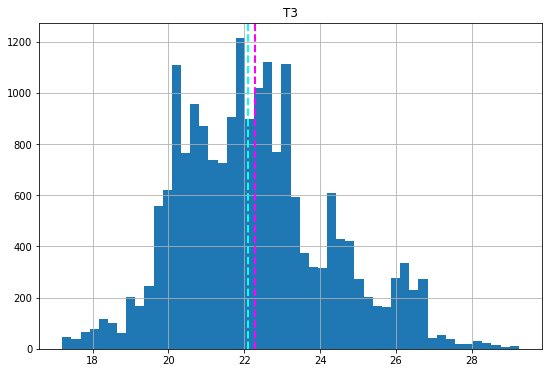

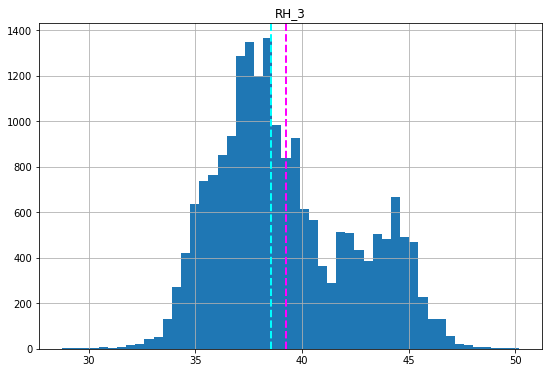

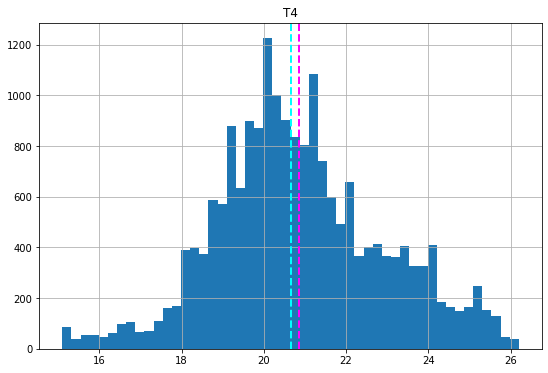

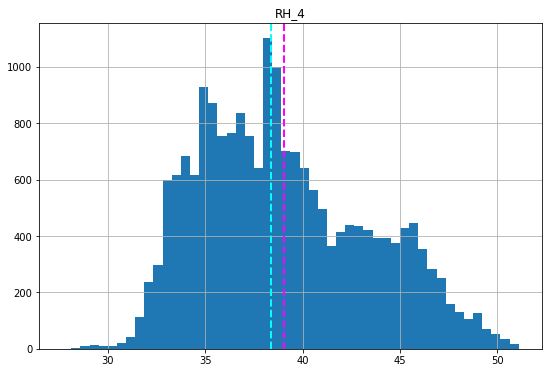

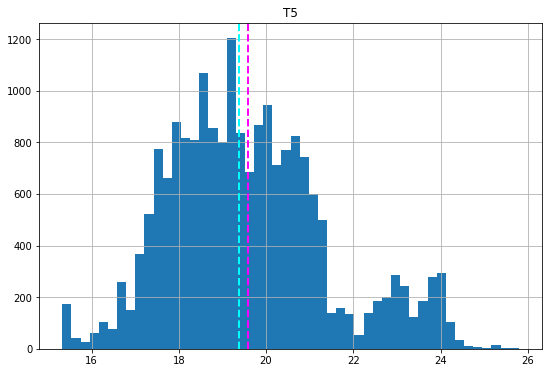

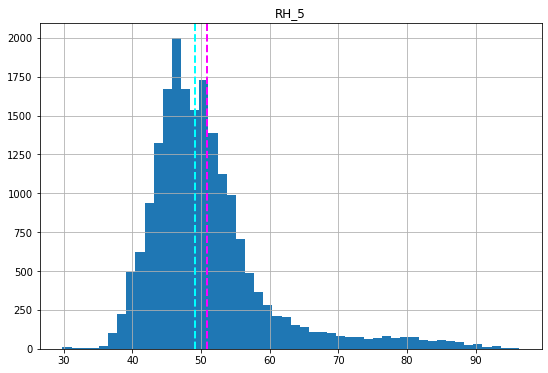

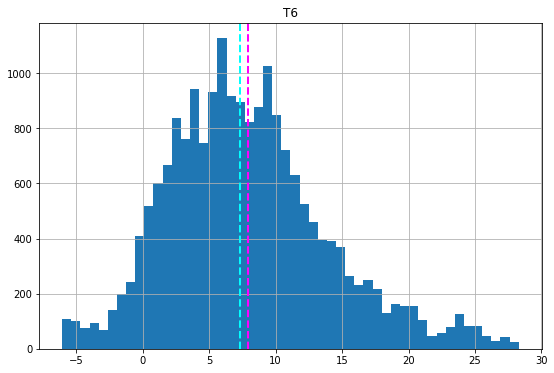

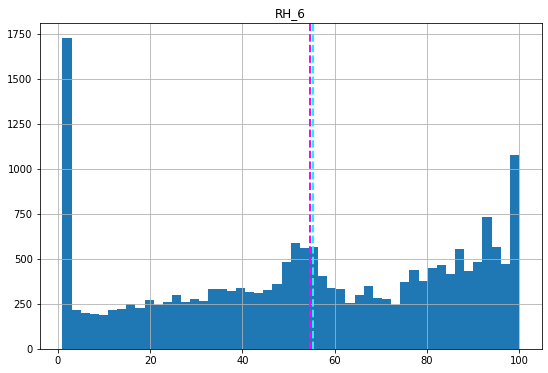

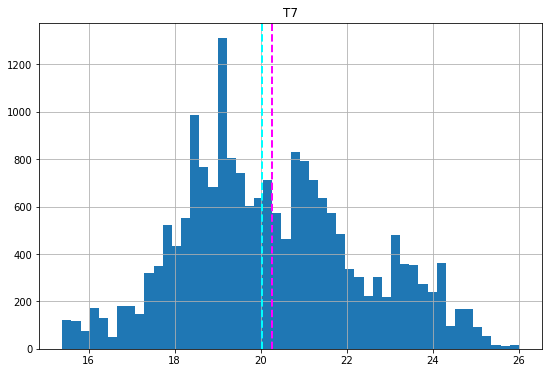

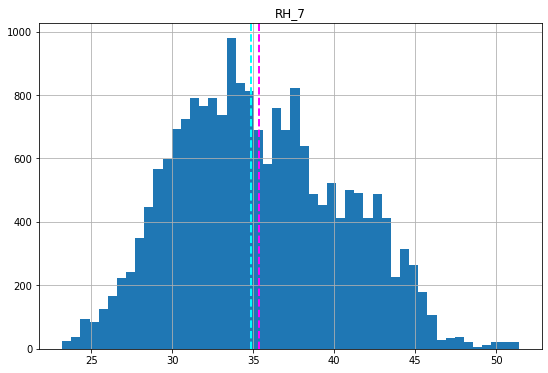

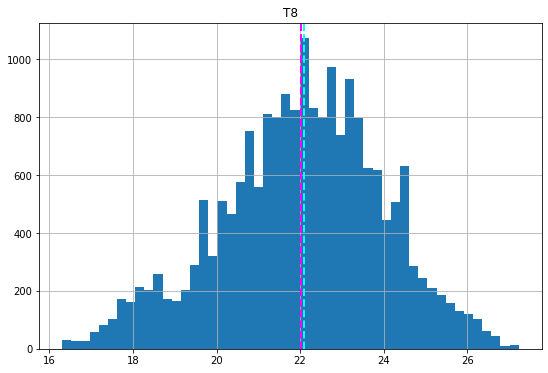

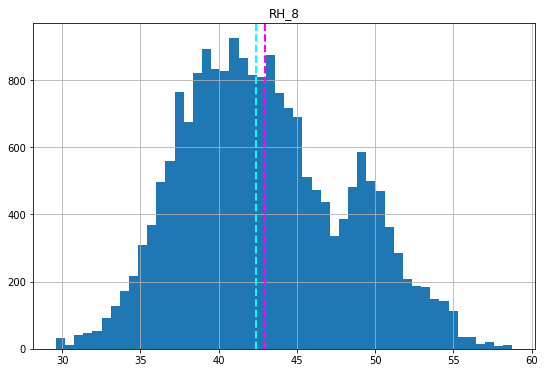

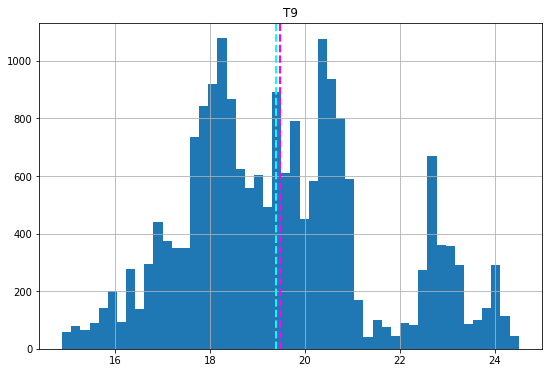

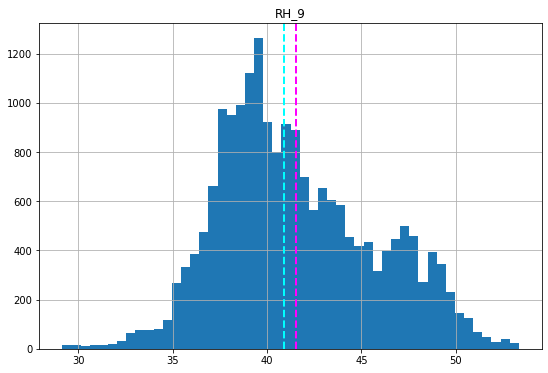

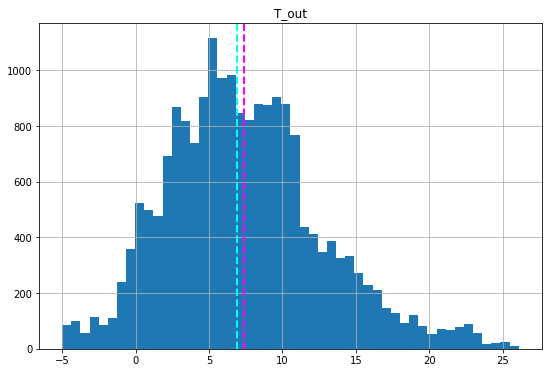

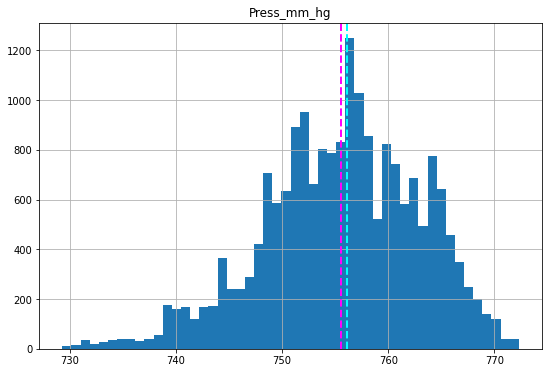

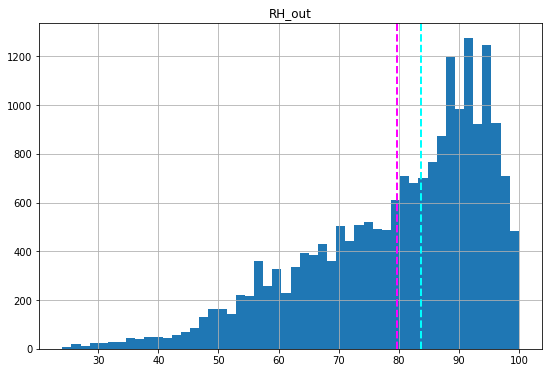

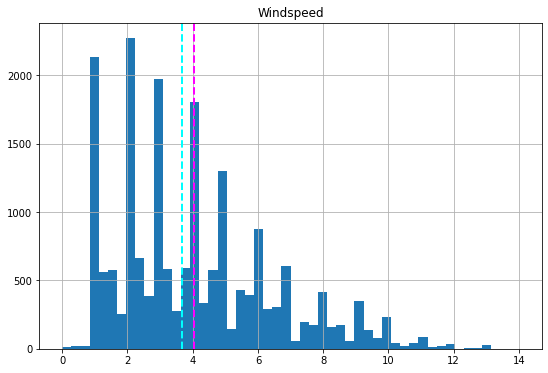

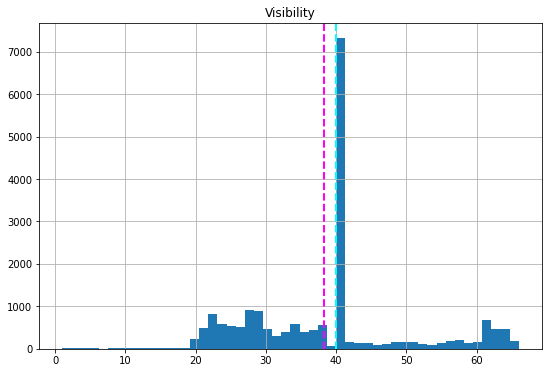

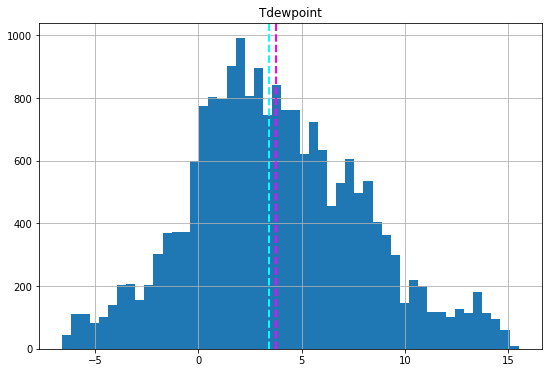

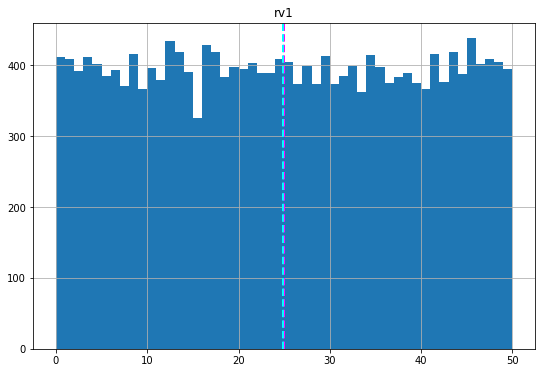

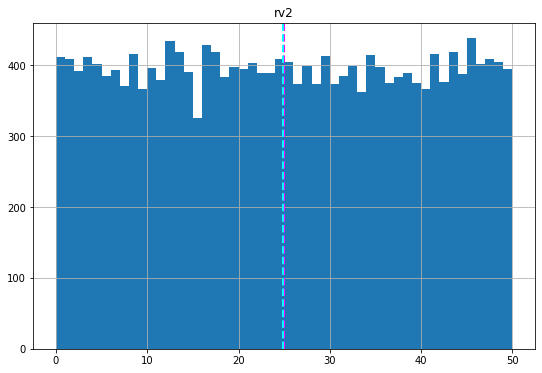

In [32]:
# plot a bar plot for each numerical feature count (except date)

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# Numeric Feature Univariate Analysis using Scatter Plot

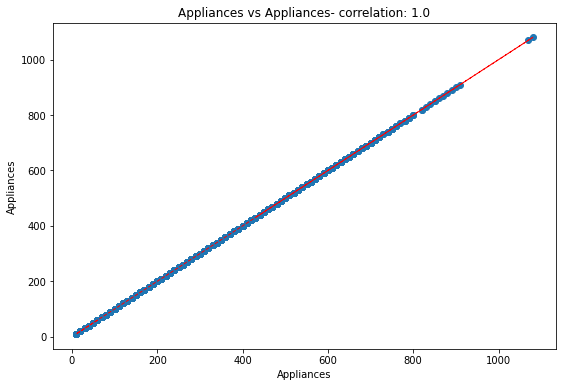

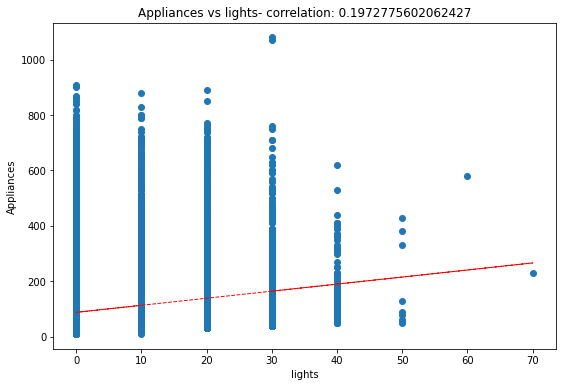

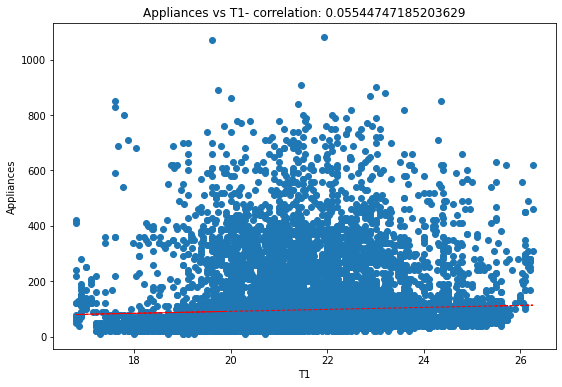

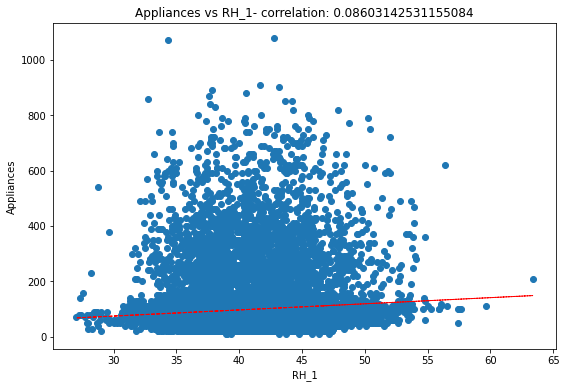

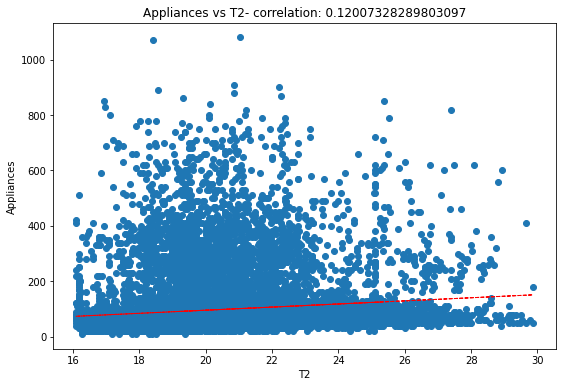

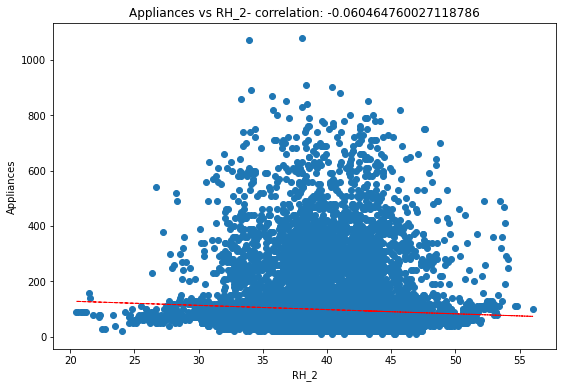

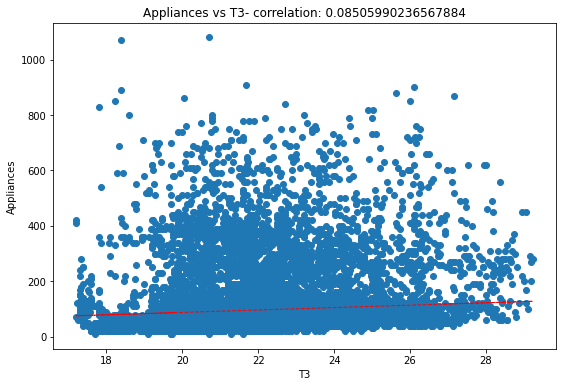

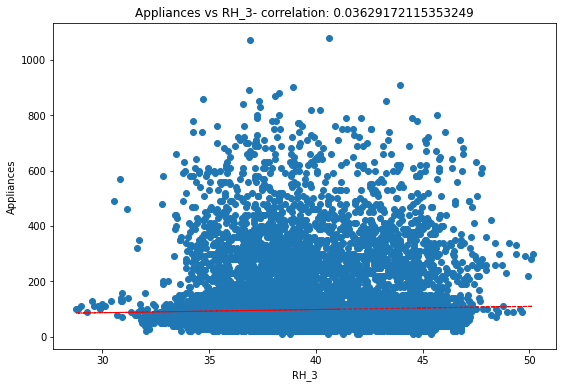

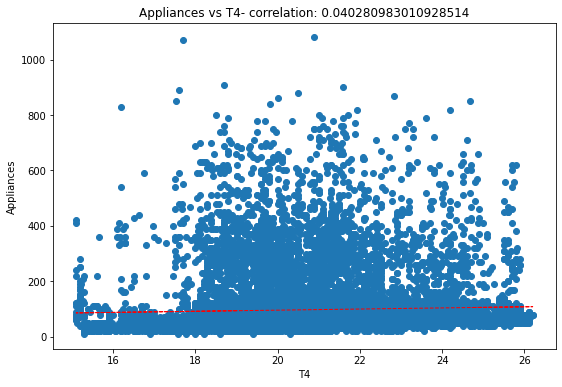

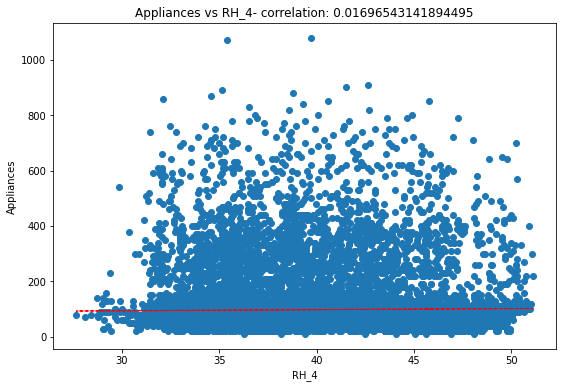

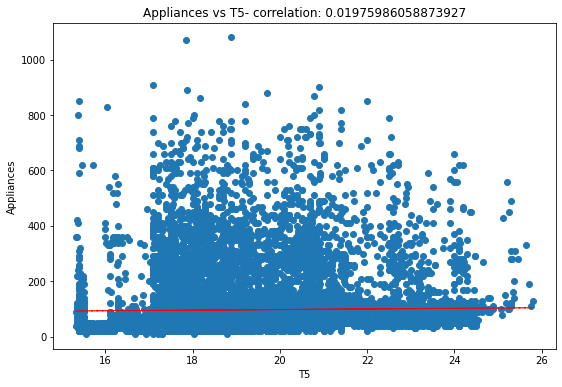

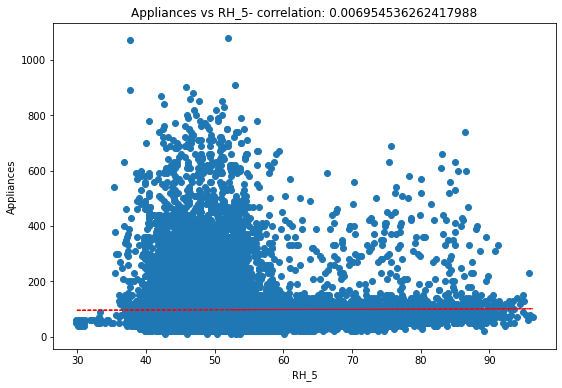

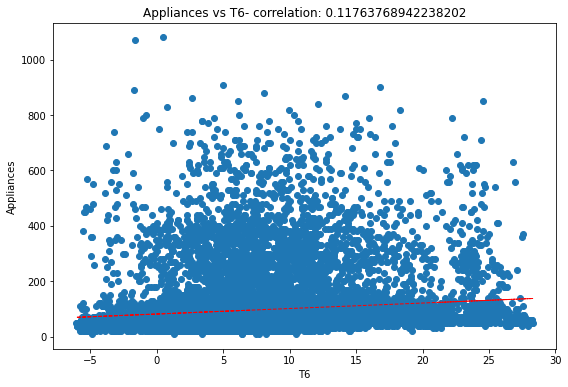

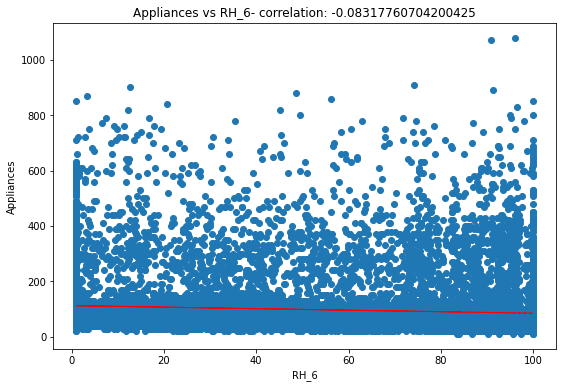

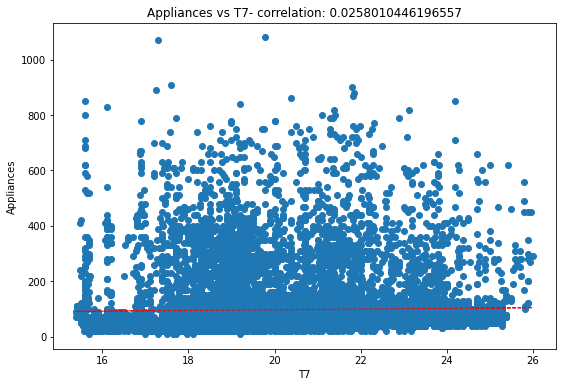

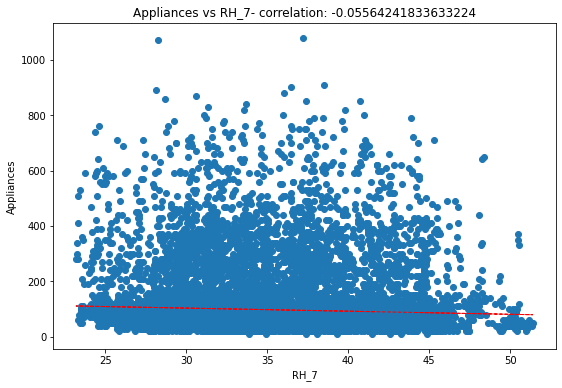

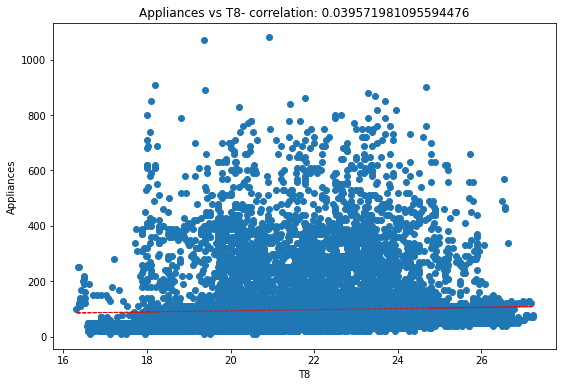

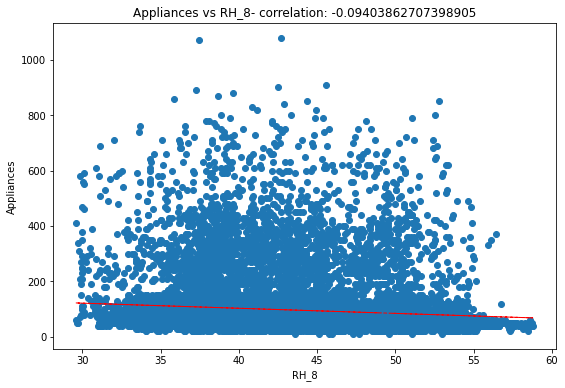

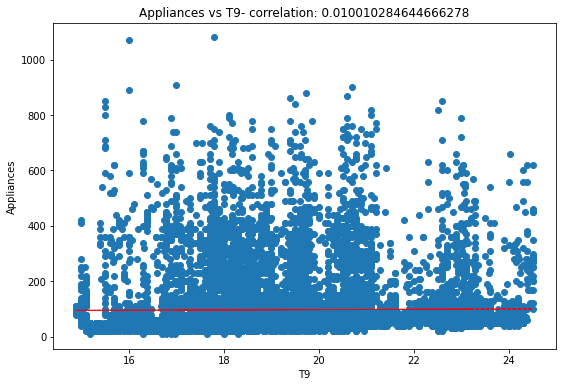

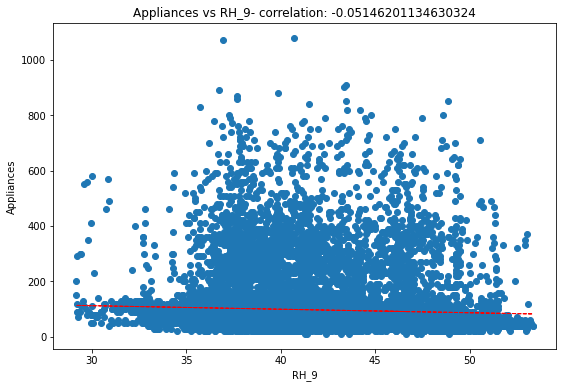

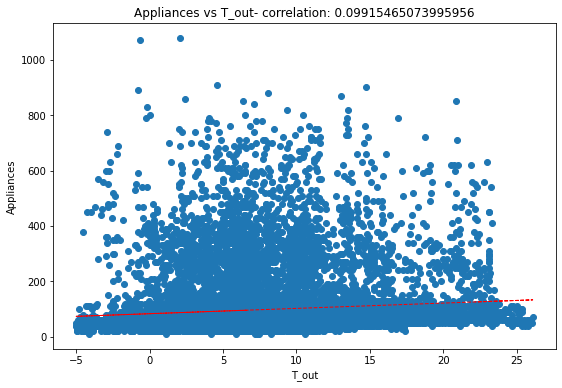

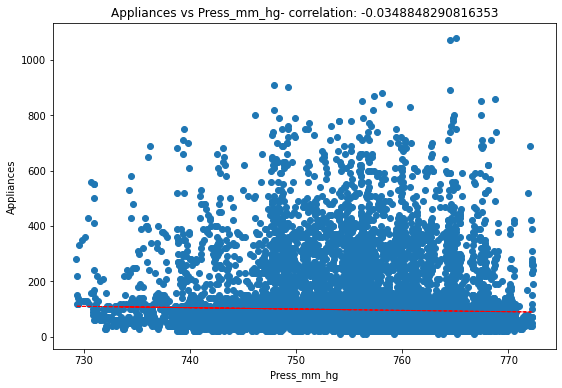

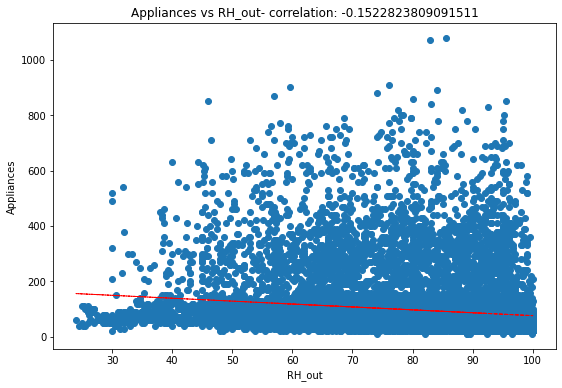

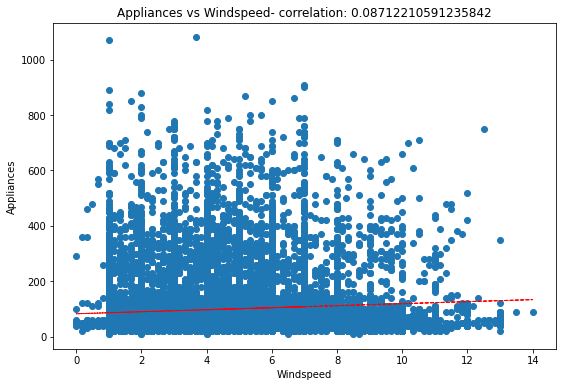

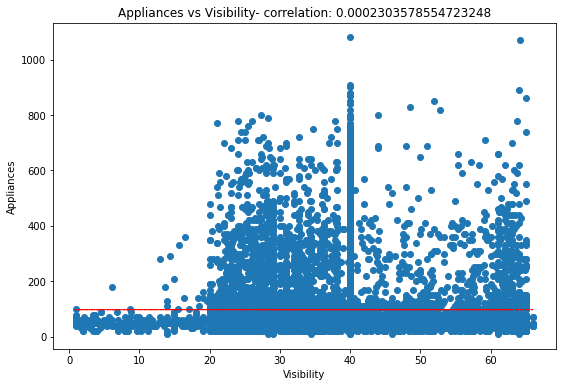

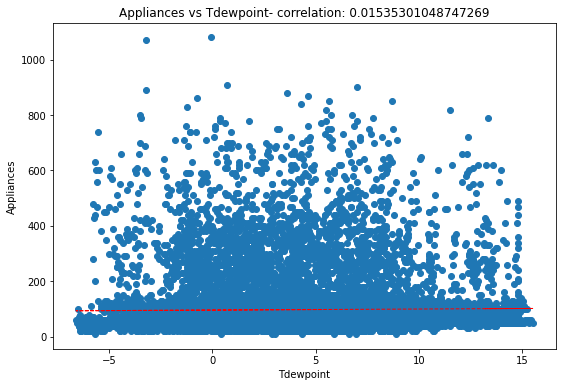

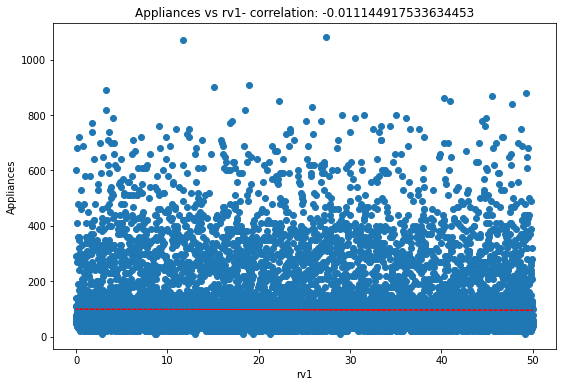

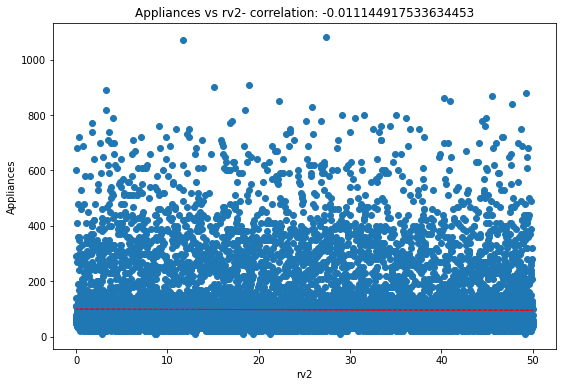

In [33]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Appliances'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

# We do not see any pattern in the data

# Numerical Variables

Since the numerical values are skewed we will perform log normal distribution

In [34]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  28


Appliances  lights     T1  ...  Tdewpoint        rv1        rv2
0          60      30  19.89  ...        5.3  13.275433  13.275433
1          60      30  19.89  ...        5.2  18.606195  18.606195
2          50      30  19.89  ...        5.1  28.642668  28.642668
3          50      40  19.89  ...        5.0  45.410389  45.410389
4          60      40  19.89  ...        4.9  10.084097  10.084097

[5 rows x 28 columns]

In [35]:
continuous_feature=[feature for feature in numerical_features]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 28


# Outliers

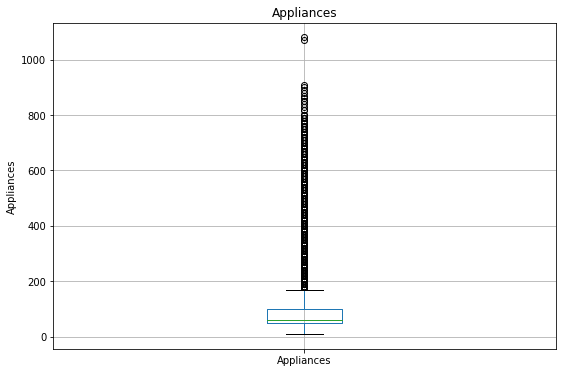

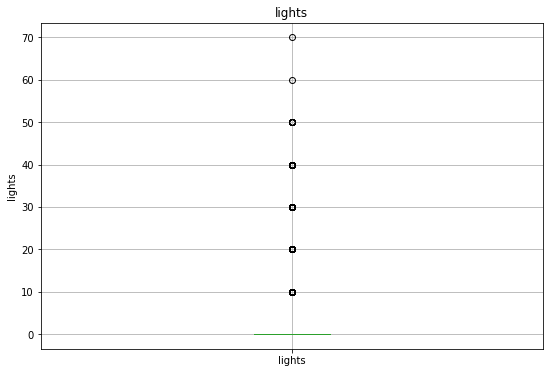

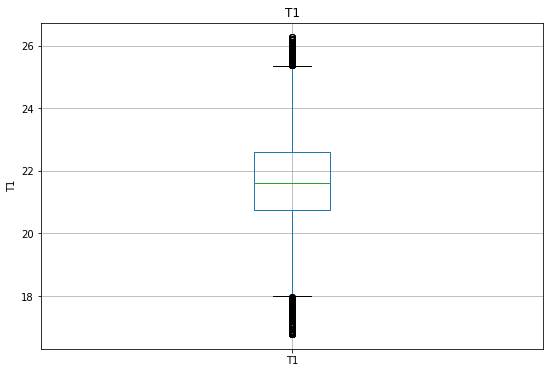

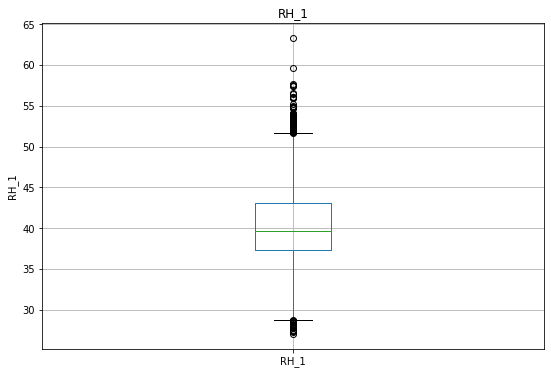

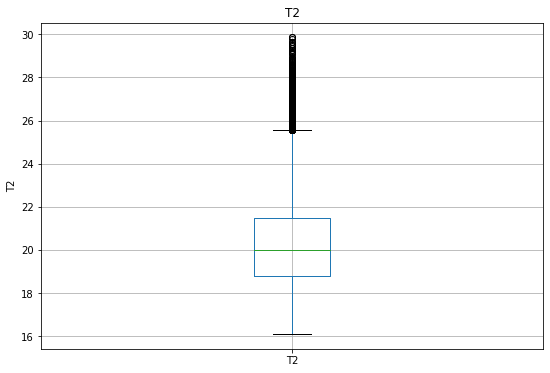

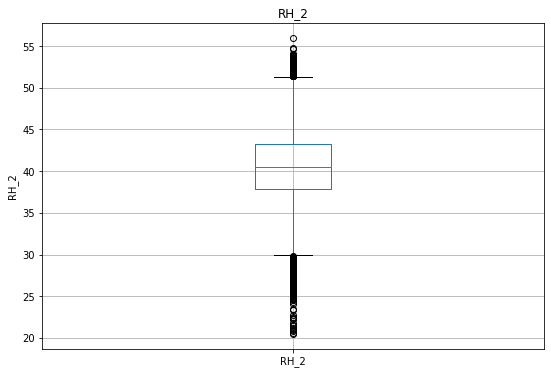

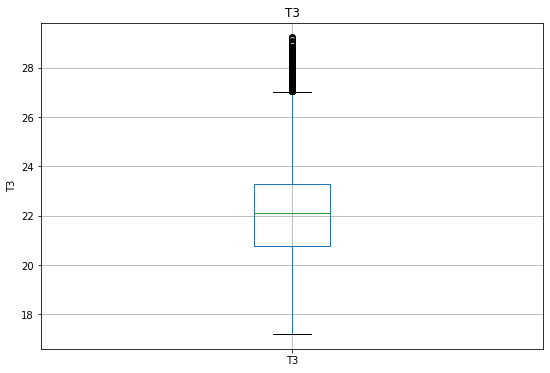

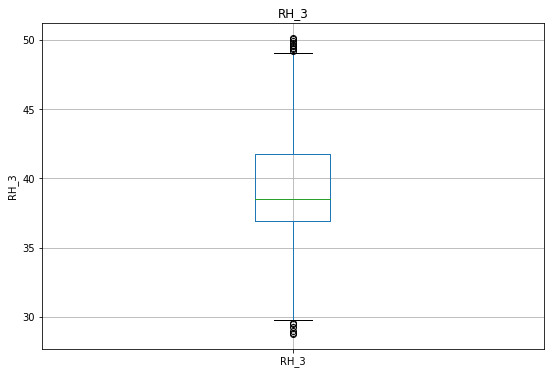

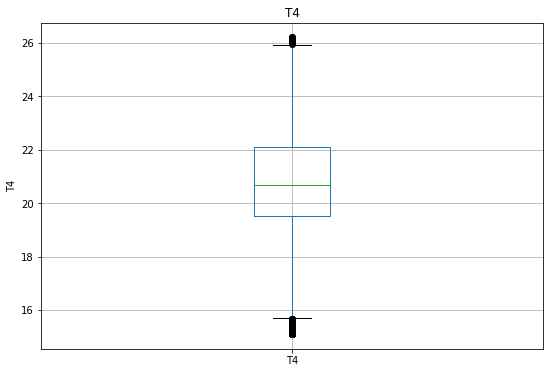

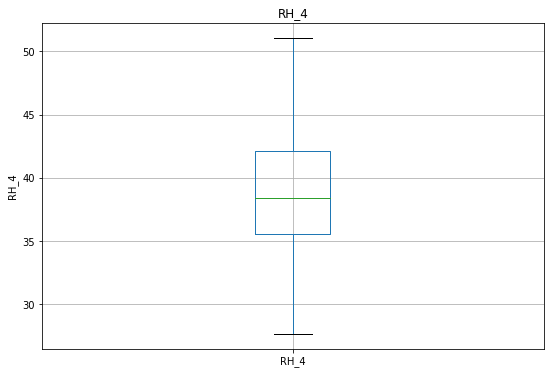

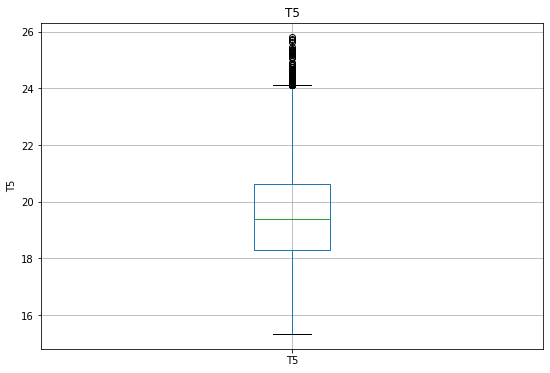

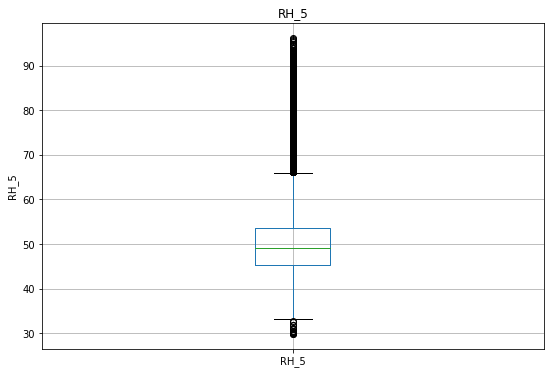

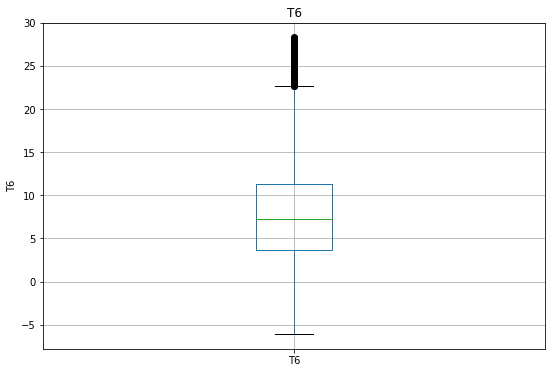

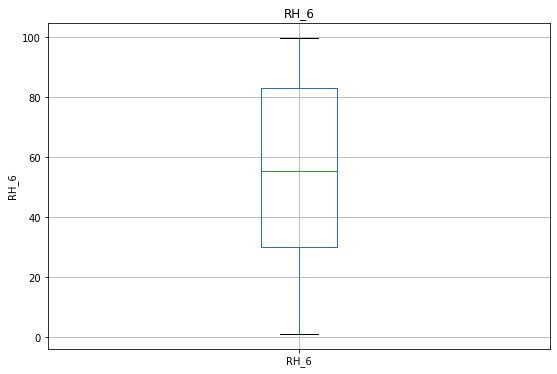

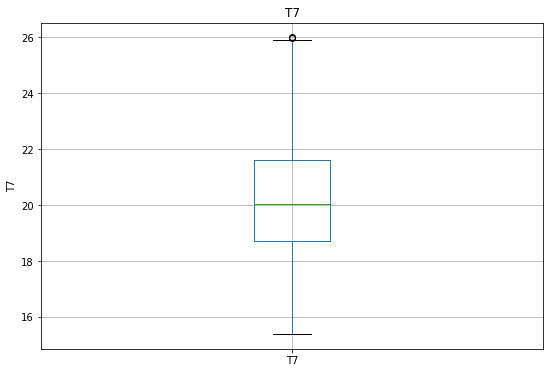

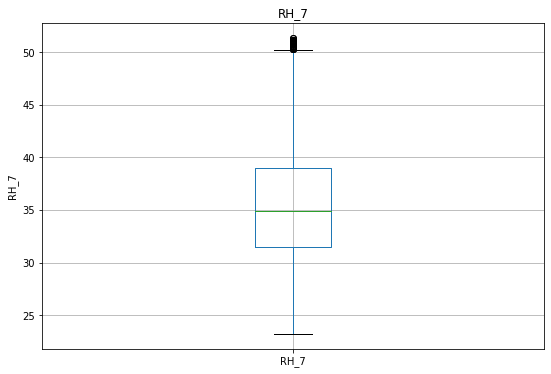

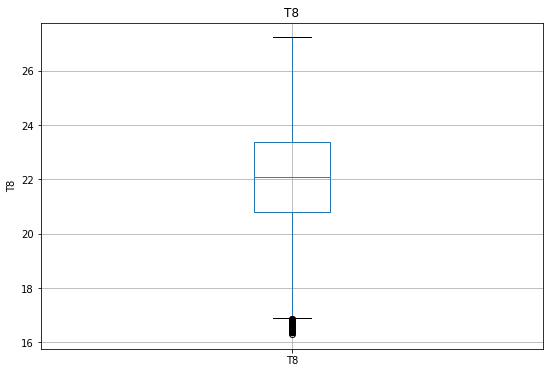

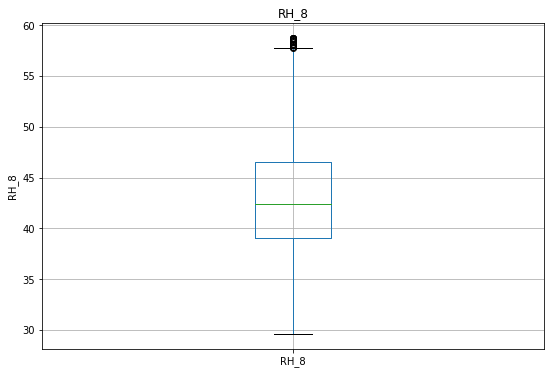

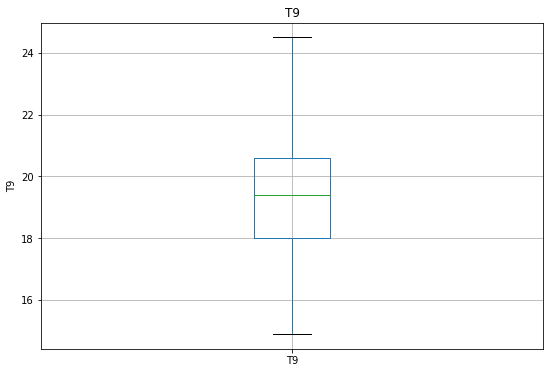

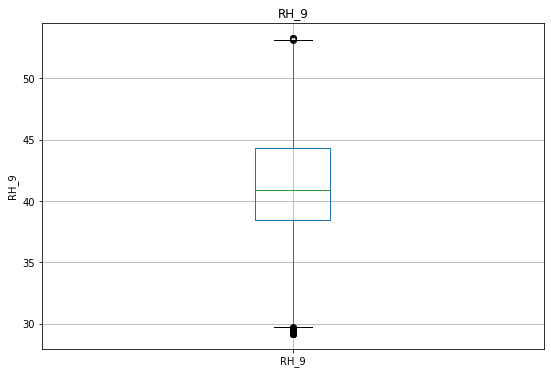

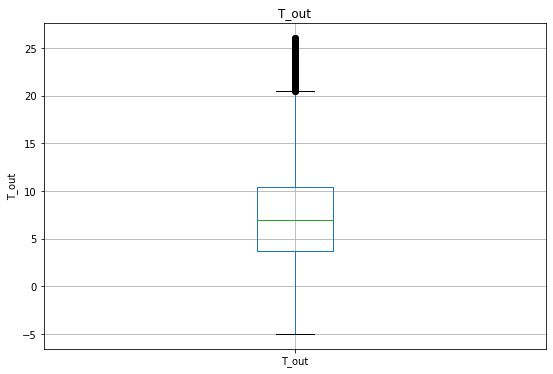

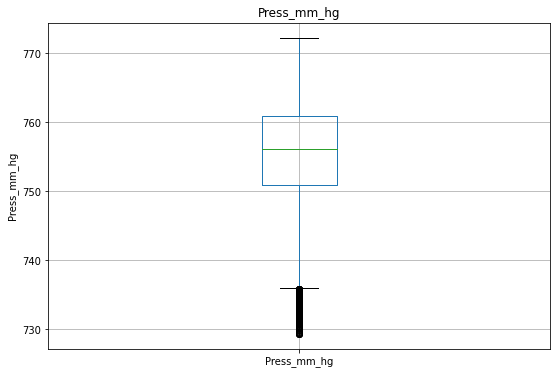

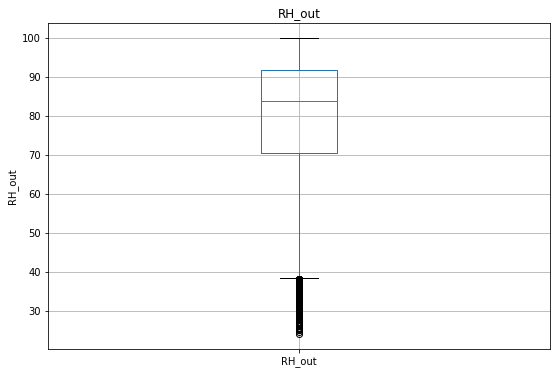

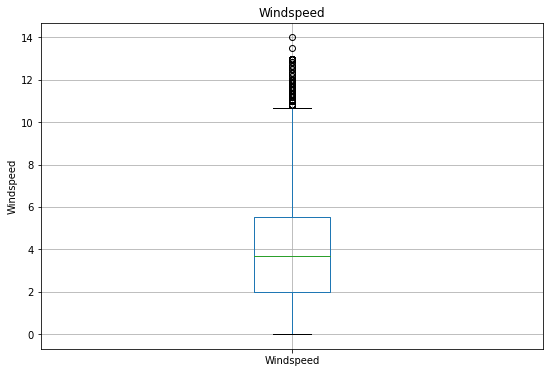

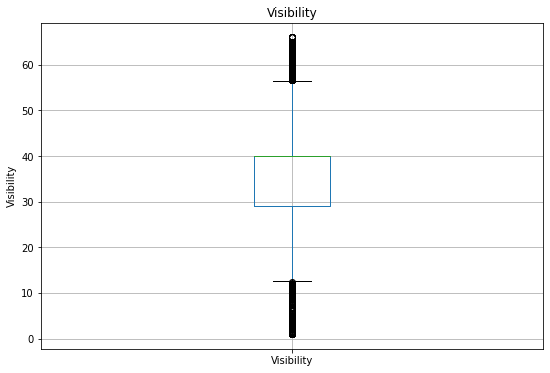

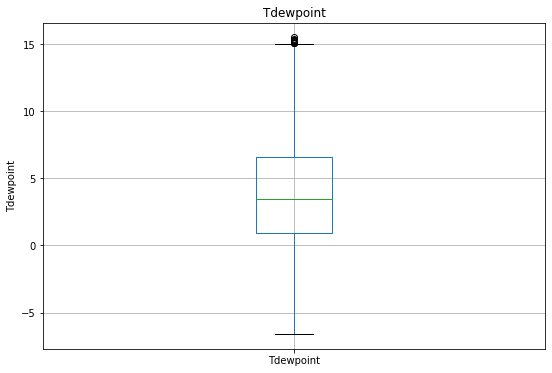

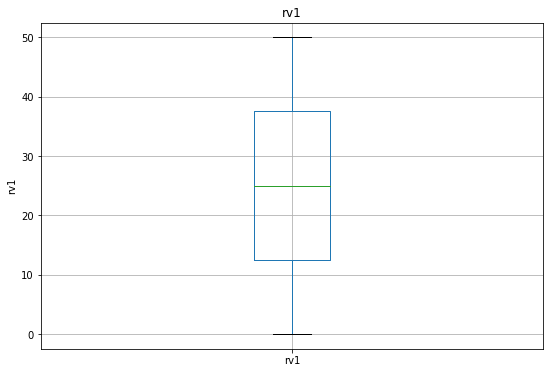

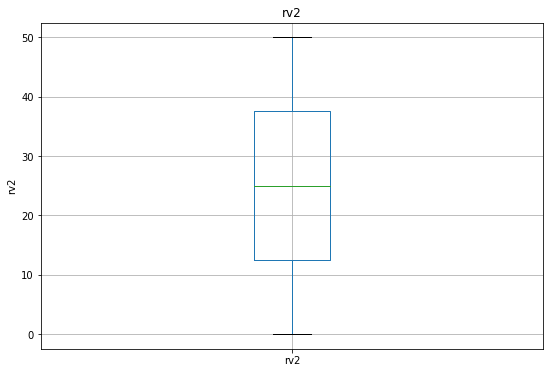

In [36]:
for feature in continuous_feature:
    fig = plt.figure(figsize=(9, 6))
    data=df.copy()
    data[feature]=(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# **Correlation Plot**

# **Bivariate horizontal Scatter plot**

In [37]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

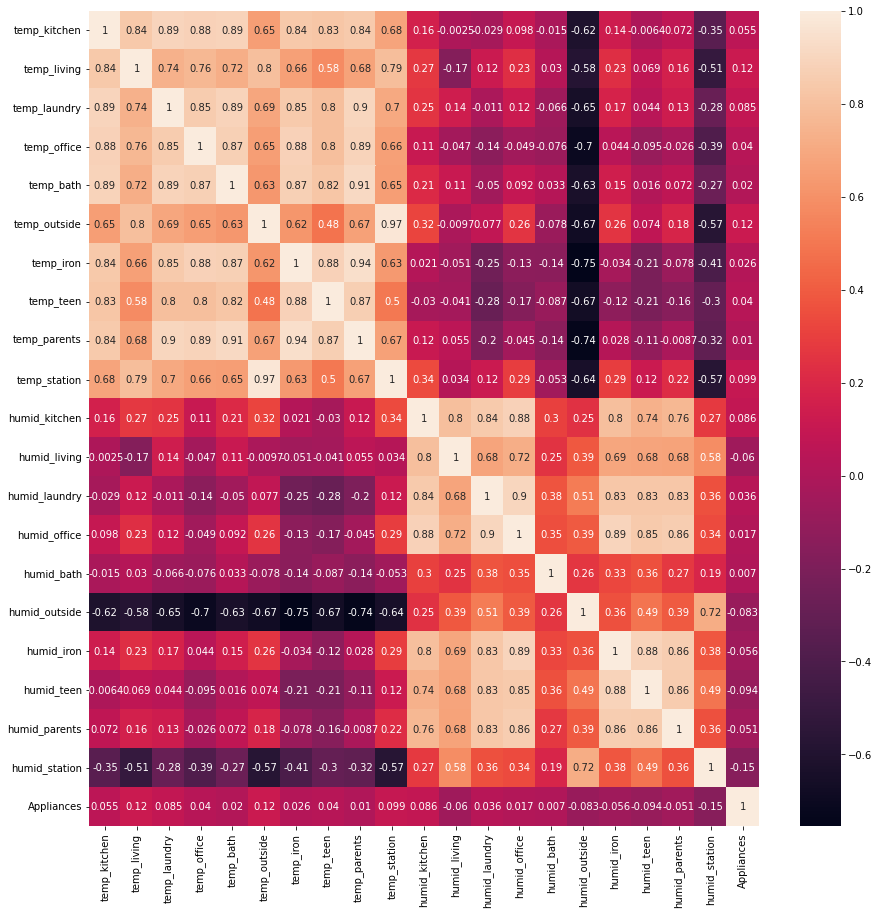

In [38]:
cols = list(temp_dict.values())
cols.extend(list(humid_dict.values()))
cols.extend(['Appliances'])
fig, ax = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(energy_df[cols].corr(), ax=ax, annot=True)

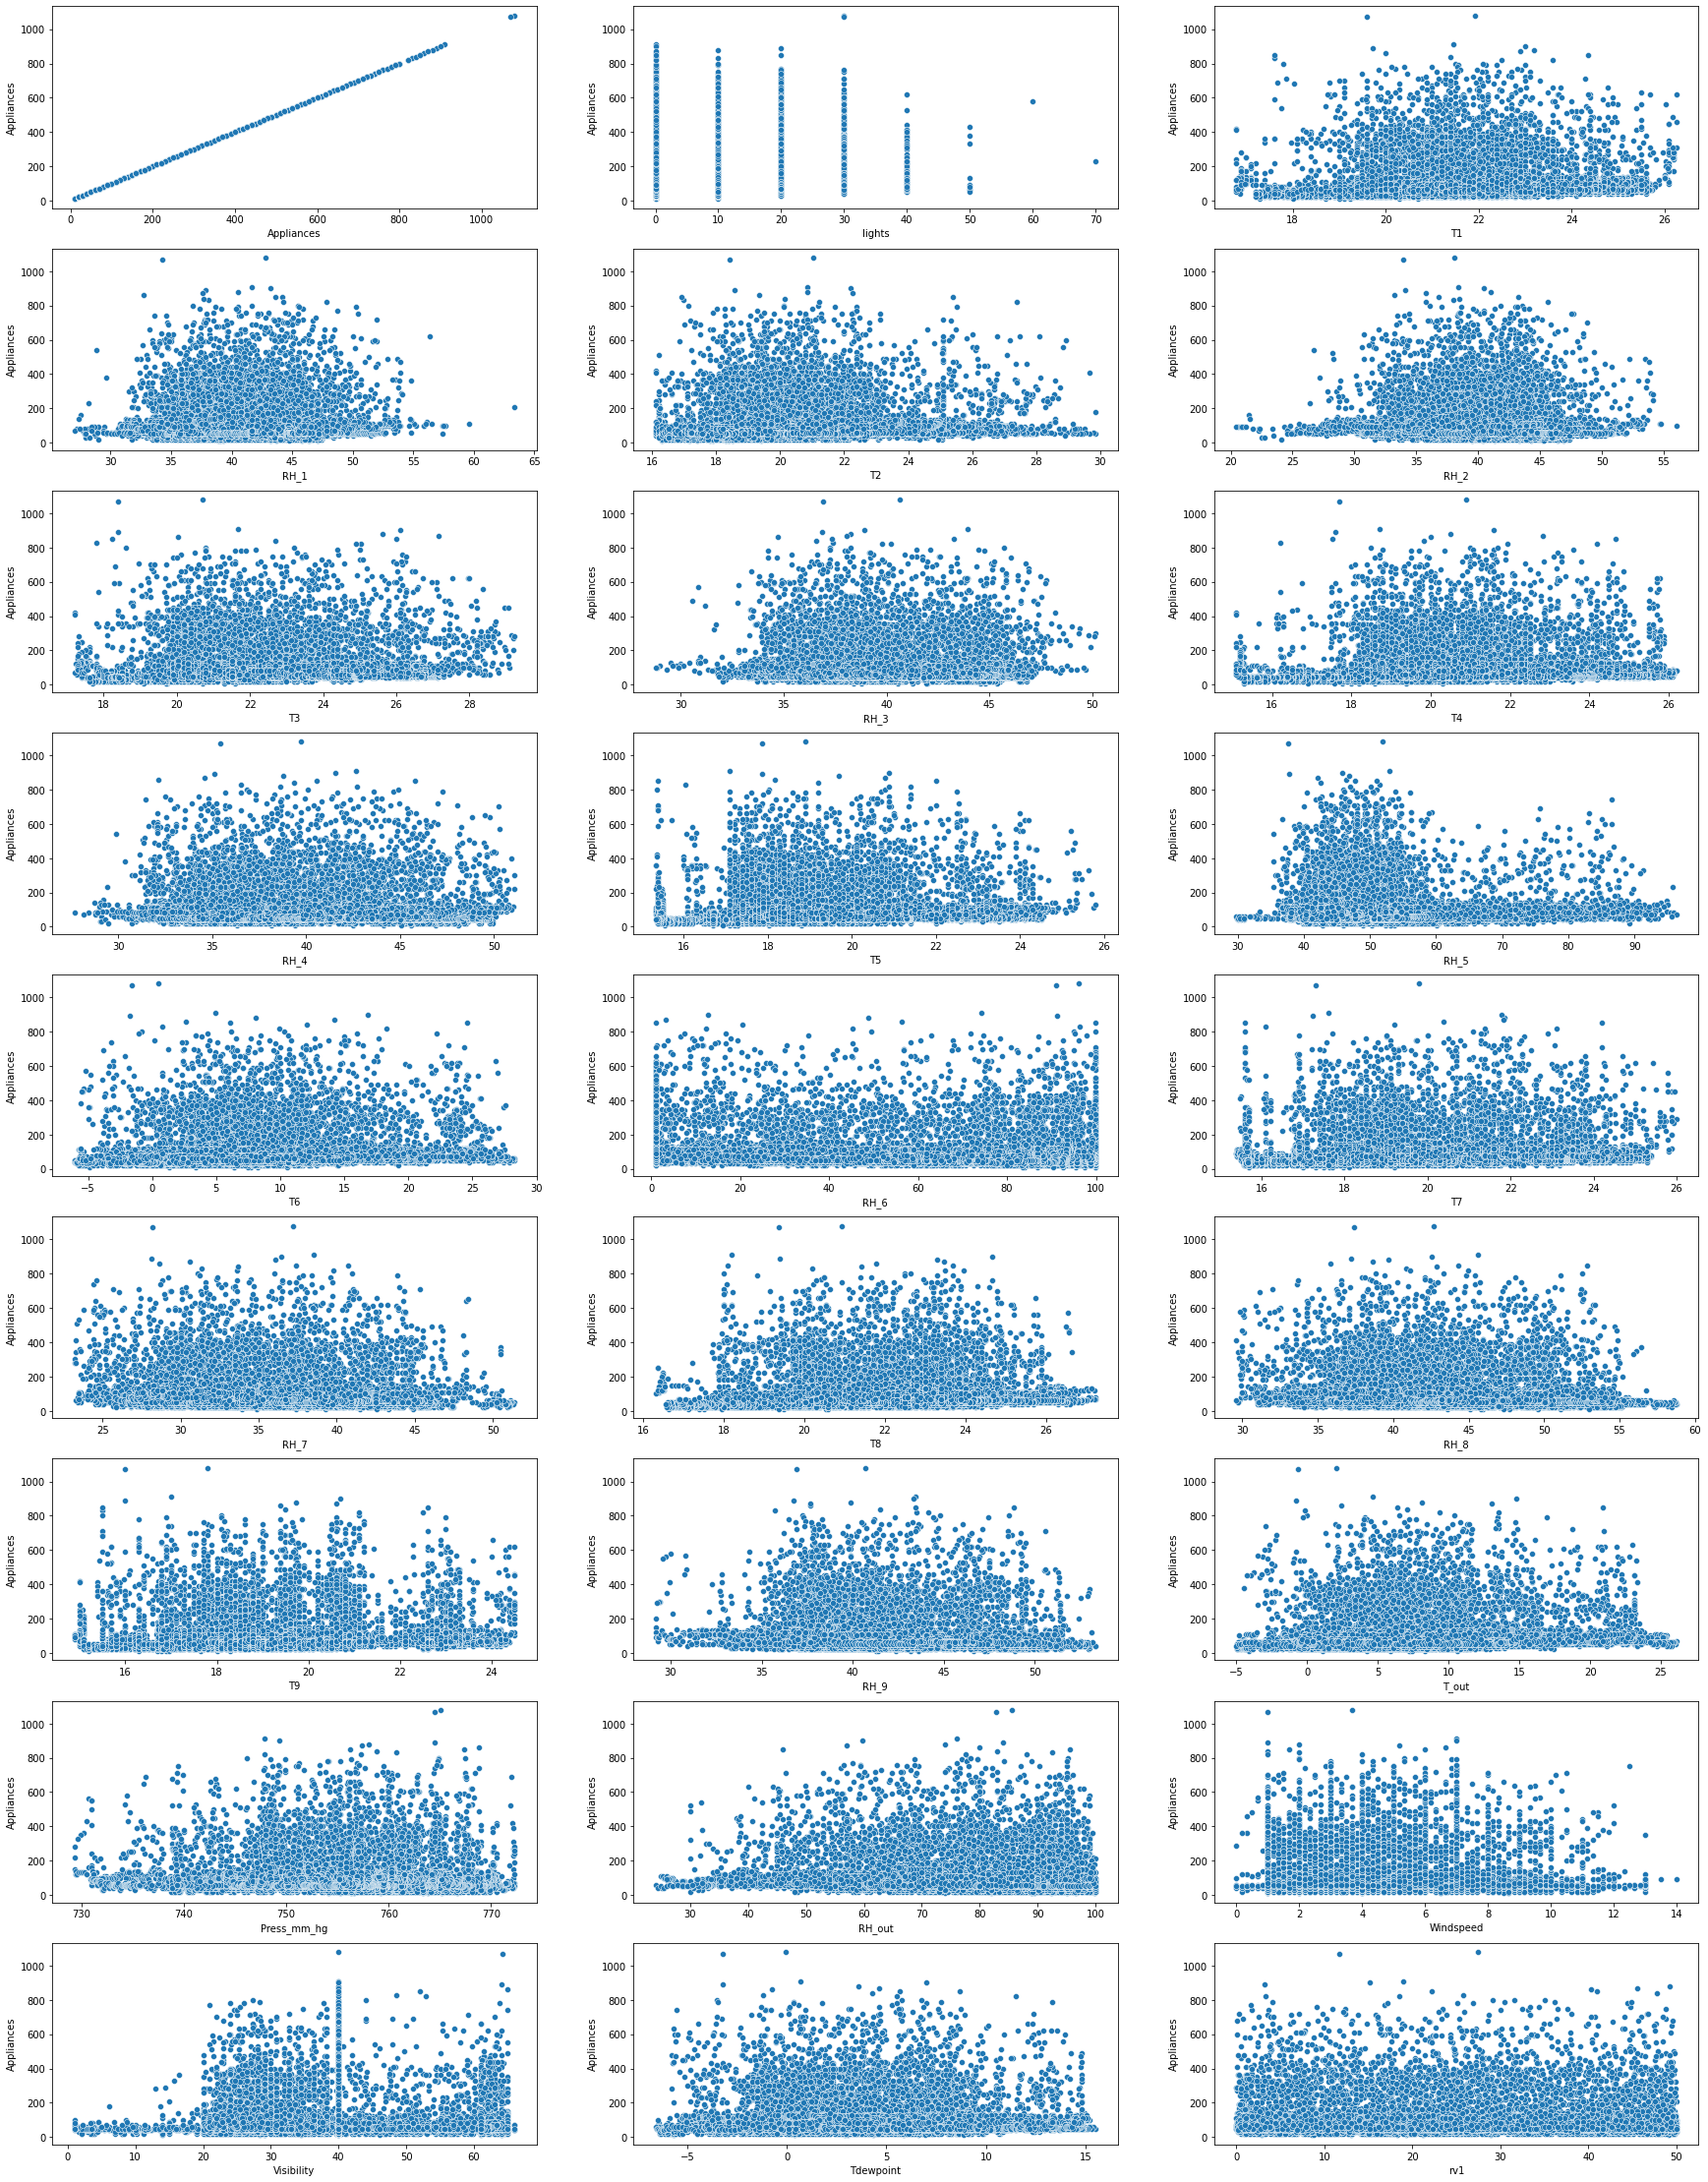

In [39]:
feature_vars = list(df.columns[1:])

ls = []
colName = [j for j in df[feature_vars]]
a = 0
while a < 10:
    for i in range(3):
        ls.append((a, i))
    a+=1

fig, ax = plt.subplots(9, 3, figsize=(30, 40))
for k in range(27):
    sns.scatterplot(data=df, x=feature_vars[k], y=df['Appliances'], ax=ax[ls[k][0], ls[k][1]])


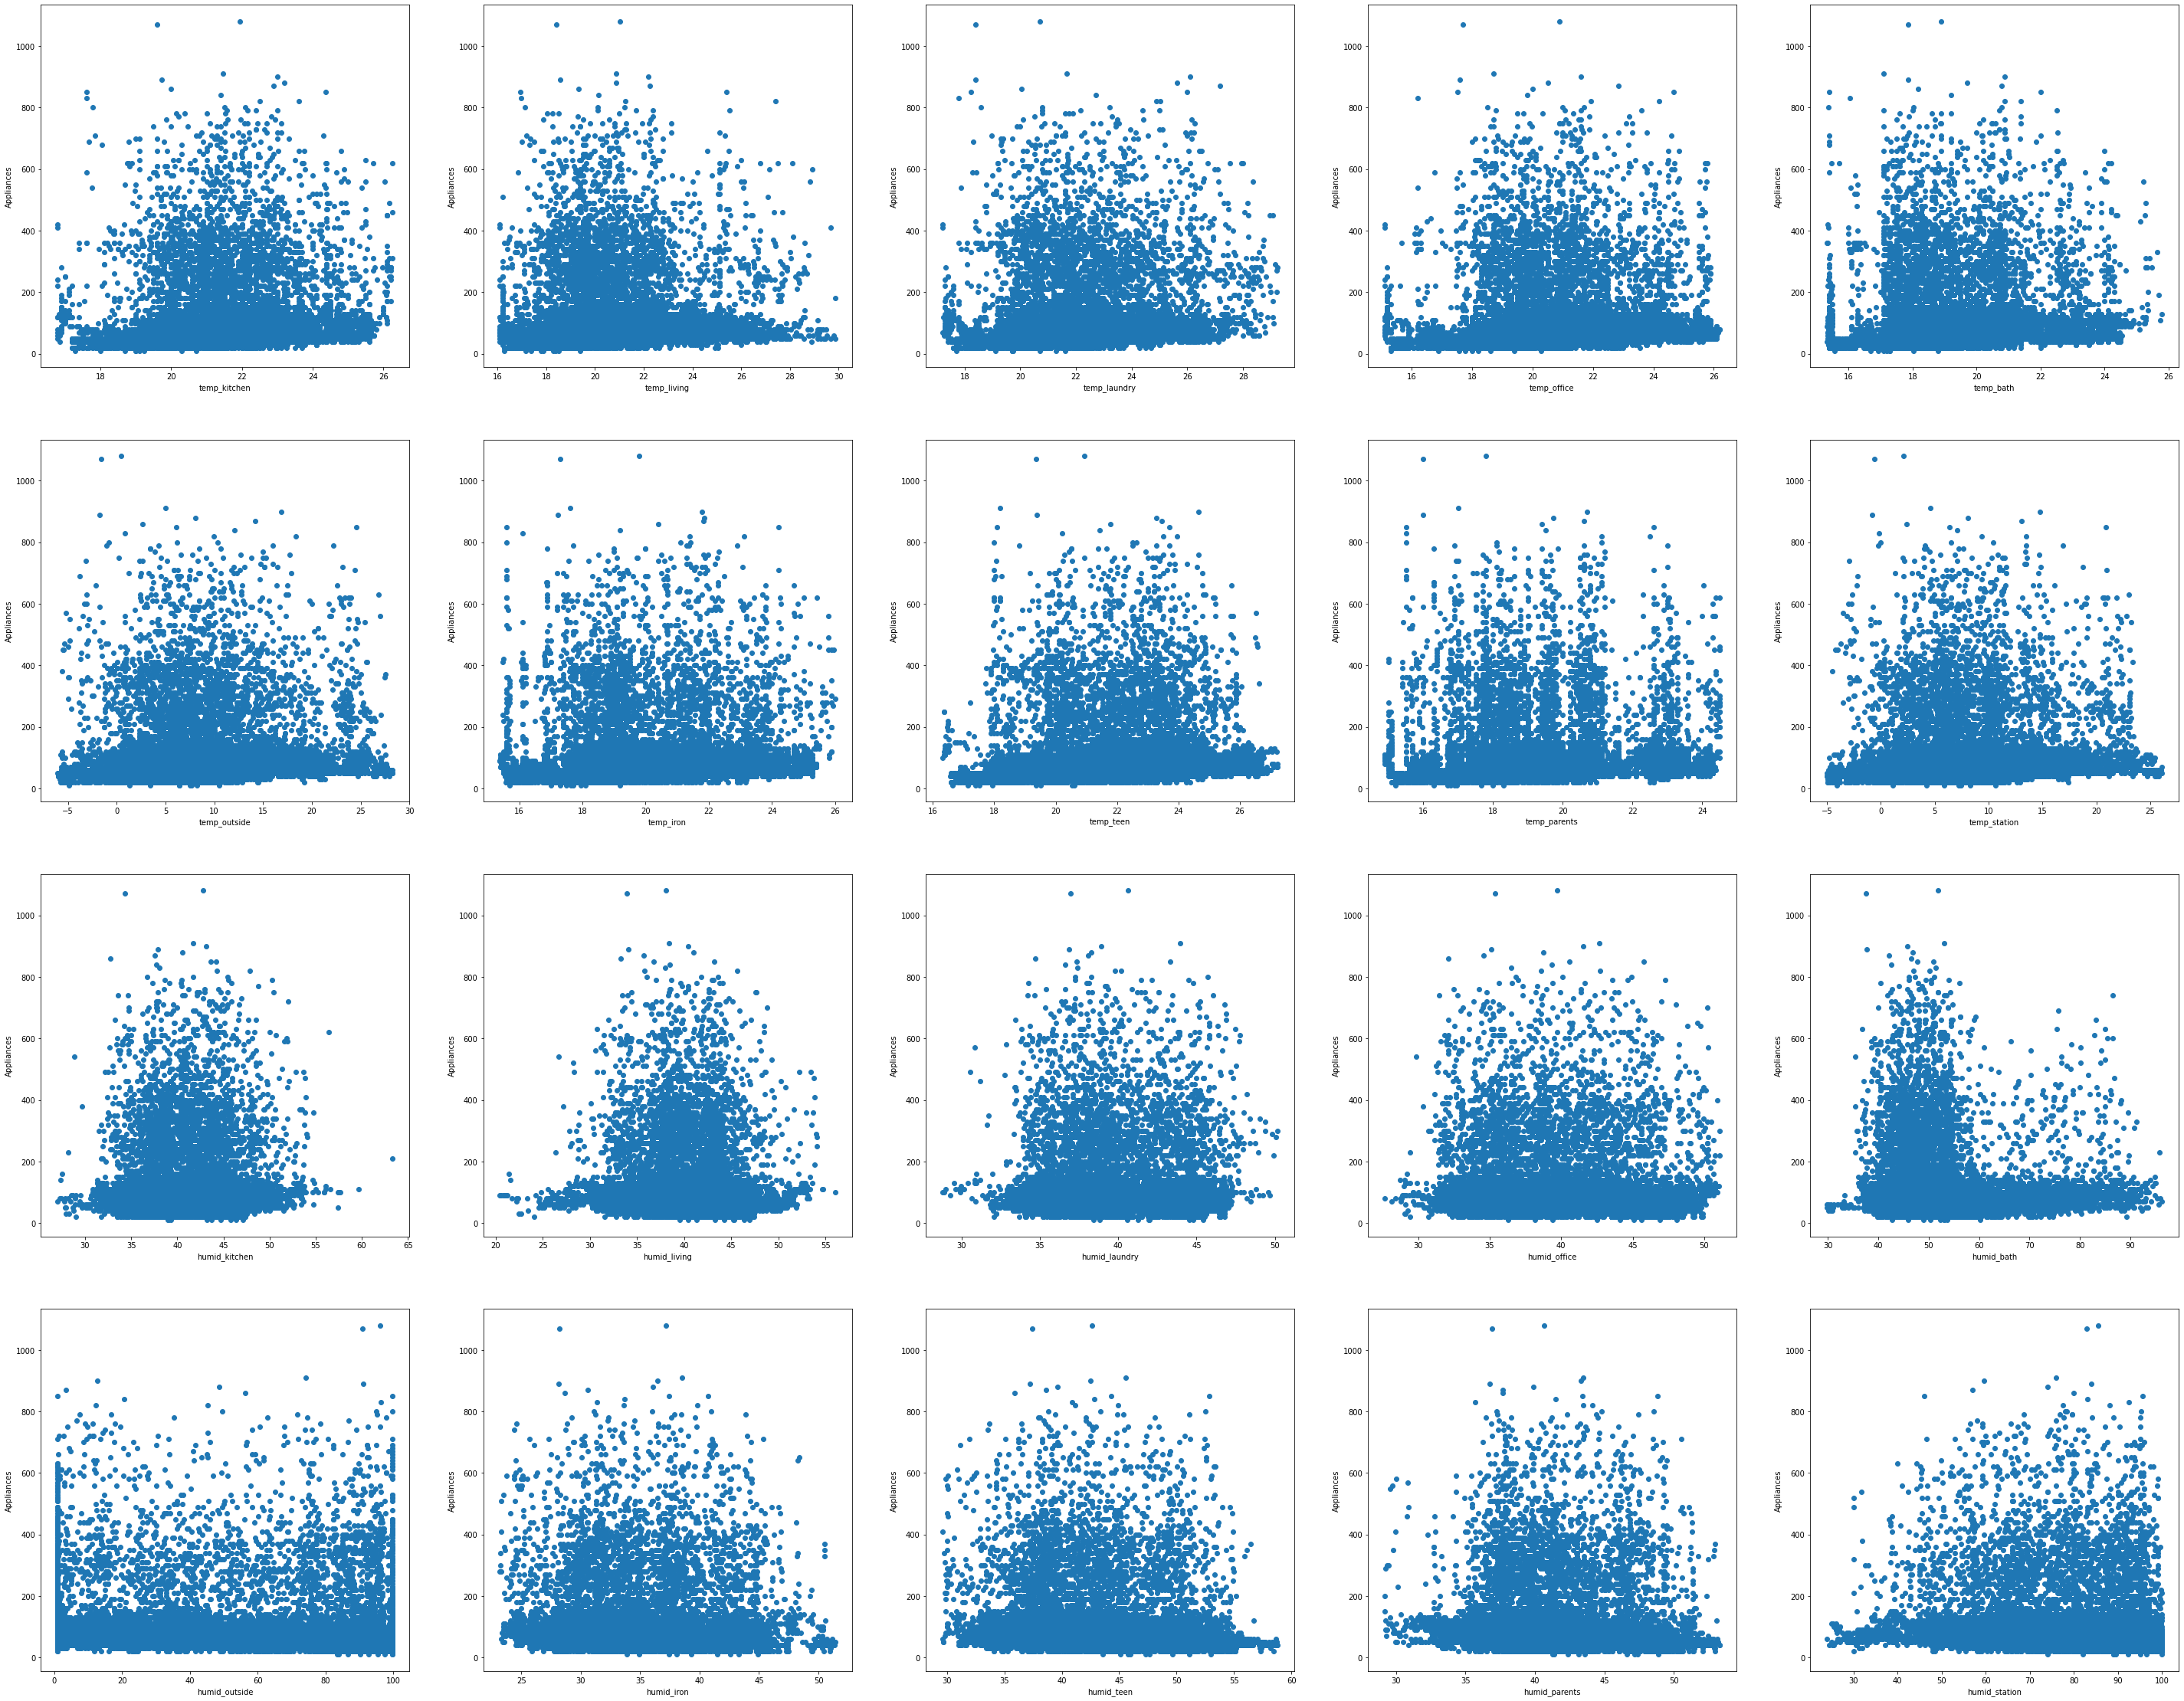

In [40]:
# let us plot the variation of energy consumption with these variables
fig, axes = plt.subplots(4,5,figsize = (50,40))
for i, col in enumerate(cols[:-1]):
  ax = axes[i//5, i%5]
  ax.scatter(energy_df[col], energy_df['Appliances'])
  ax.set_xlabel(col)
  ax.set_ylabel('Appliances')

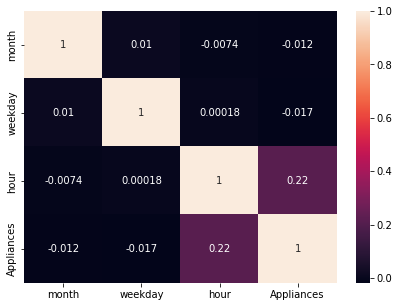

In [41]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
sns.heatmap(energy_df[['month', 'weekday', 'hour', 'Appliances']].corr(), annot=True, ax=ax)



*   As we have observed earlier as well, there seenms to be no correlation between month and the observed energy use i.e. the enegy consumption pretty much remains similar over all months. Similarly there is no direct effect of weekdays on appliance energy consumption.
*   Although there is a correlation of 0.22 between hour and appliances



In [42]:
def create_session(x):
  if x <= 6 or x >= 22:
    return 1
  elif x>6 and x <=15:
    return 2
  else:
    return 3

In [43]:
# lets create a new column based on our observations
energy_df['session'] = energy_df['hour'].apply(lambda x : create_session(x))

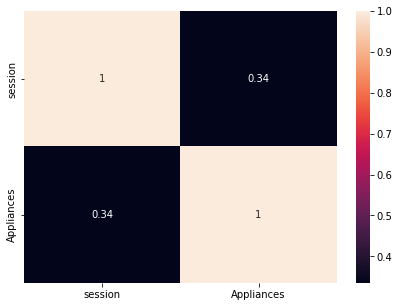

In [44]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
sns.heatmap(energy_df[['session', 'Appliances']].corr(), ax = ax, annot=True)

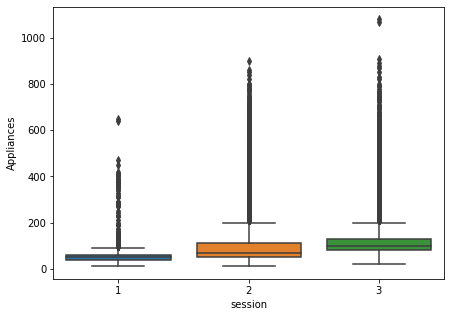

In [45]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
sns.boxplot(x='session',y='Appliances',data=energy_df, ax = ax)

We were now able to increase the correlation to 0.34 by making creating this new row. We see a clear distinction of power consumtion in different sessions.

Lets look at features related to weather as well.

# **Extracting date time features from the date column**

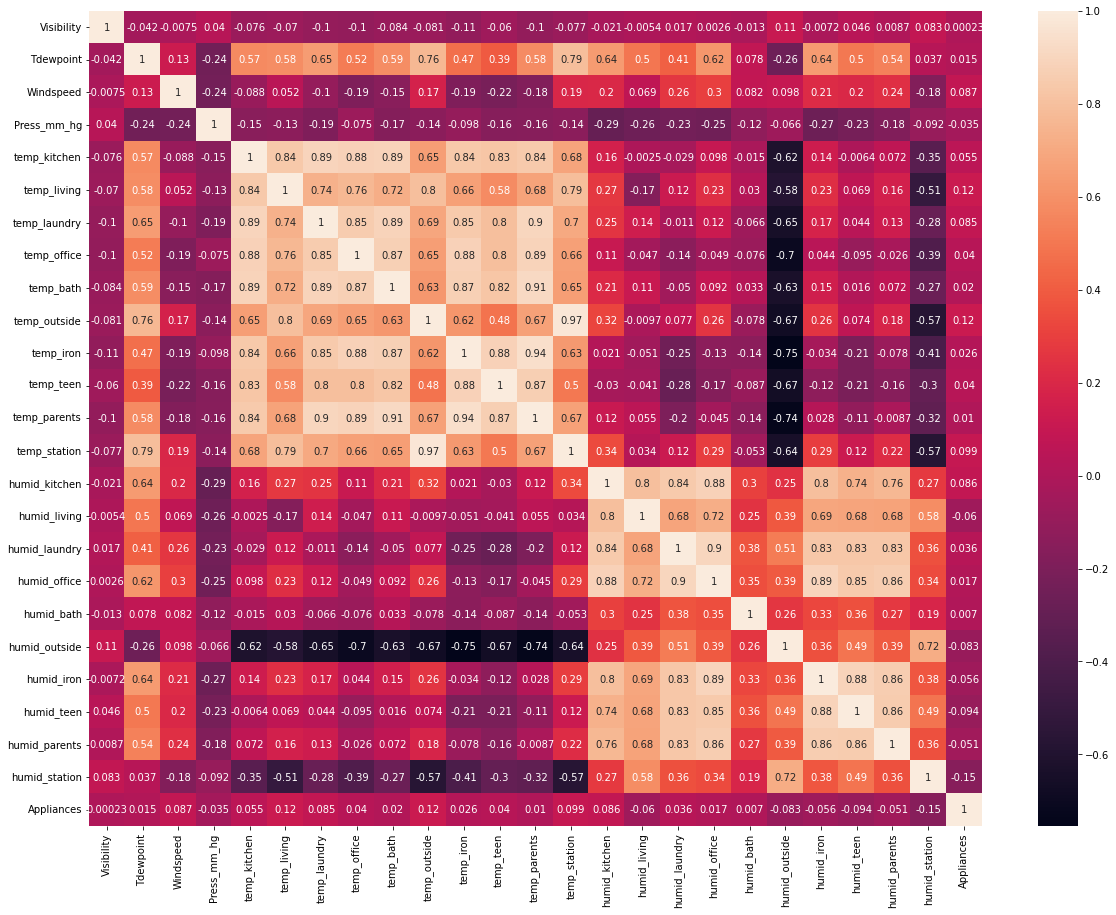

In [46]:
fig,ax = plt.subplots(1,1,figsize=(20,15))
sns.heatmap(energy_df[weather_cols + cols].corr(), ax = ax, annot=True)

In [47]:
temp_cols = list(set(list(temp_dict.values())) - {'temp_outside', 'temp_station'})
energy_df['mean_temp'] = energy_df[temp_cols].mean(axis=1)
energy_df[['mean_temp', 'Appliances']].corr()

mean_temp  Appliances
mean_temp     1.00000     0.05474
Appliances    0.05474     1.00000

# **Plotting Features Over Time**

In [48]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [49]:
fig = px.line(df, x='date', y=df.Appliances)
fig.show()



*   We can see that there peaks of high appliance usage and low appliance usage. This could probably indicate night time and day time.








*  There are two large gaps in appliance usage. 

 *   between 21 Jan 2016 and 30 Jan 2016
 *    between 1 April 2016 and 3 April 2016






# **Mean appliance usage with respect to different time features**

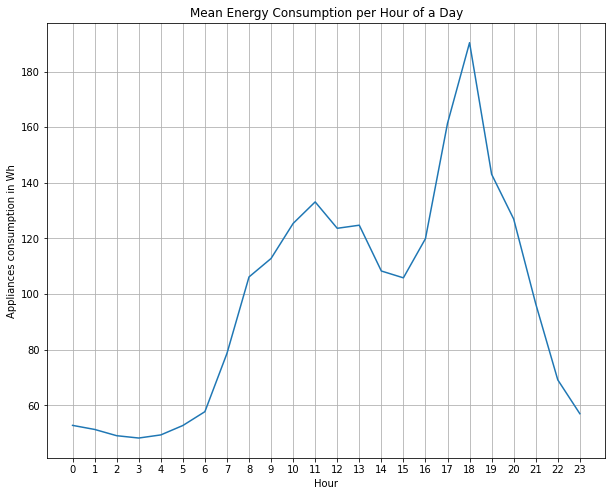

In [50]:
# Mean Energy Consumption per Hour
from datetime import datetime
df['hour']=(df['date'].str.split(' ').str[1].str.split(':').str[0]).astype(int)
df.groupby('hour')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks)
plt.grid()
plt.show()



1.   List itemDuring night time appliance usage is low.
2.   High during morning hours
3. And it peaks during the evening.


In [51]:
from datetime import datetime

In [52]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [53]:
df['day_num'] = df['date'].apply(lambda x: datetime.strftime(x, '%w'))

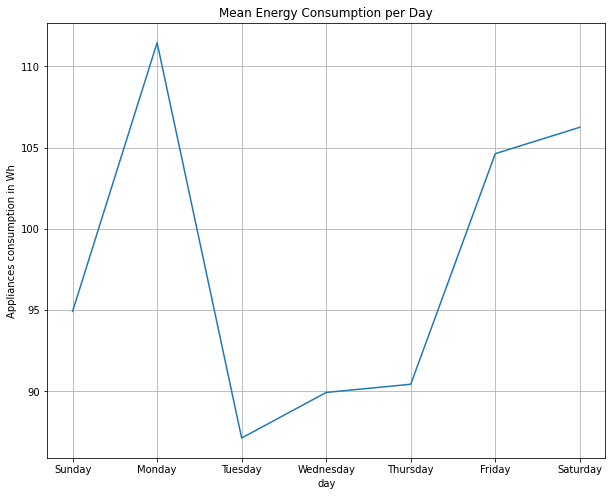

In [54]:
# Mean Energy Consumption on different days of the week

df.groupby('day_num')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('day')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 7, 1))
plt.title('Mean Energy Consumption per Day')

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks, labels=labels)
plt.grid()
plt.show()

# **PCA on temperatures**

In [55]:
train_energy_df, test_energy_df = train_test_split(energy_df, test_size=0.2, random_state=1)

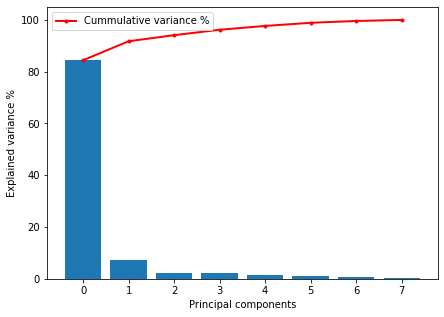

In [56]:
pca = PCA()
pca.fit(train_energy_df[temp_cols])
temp_pca = pca.transform(energy_df[temp_cols])
variance = pca.explained_variance_ratio_*100
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.bar(range(len(variance)), variance)
ax.plot(range(len(variance)), np.cumsum(variance),'r.-',linewidth=2, label='Cummulative variance %')
ax.set_xlabel('Principal components')
ax.set_ylabel('Explained variance %')
plt.legend(loc='best')

In [57]:
variance

array([84.42749838,  7.33014216,  2.3562388 ,  2.09550508,  1.47195967,
        1.21891325,  0.69977714,  0.39996553])

First two components seem to explain more than 91 % of variance in data.

In [58]:
for i in range(temp_pca.shape[1]):
  energy_df[f'temp_pca{i+1}'] = temp_pca[:,i]

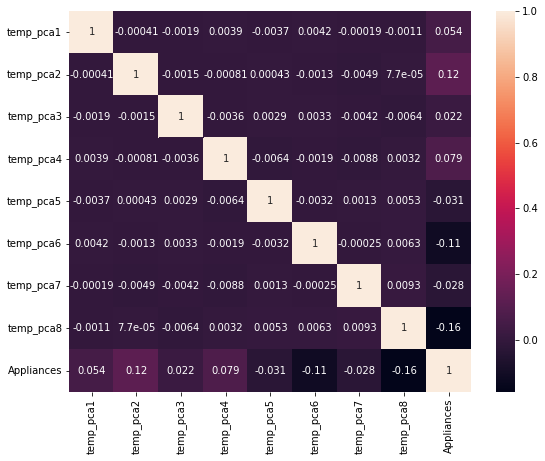

In [59]:
fig,ax = plt.subplots(1,1,figsize=(9,7))
sns.heatmap(energy_df[['temp_pca1', 'temp_pca2', 'temp_pca3', 'temp_pca4','temp_pca5', 'temp_pca6', 'temp_pca7', 'temp_pca8', 'Appliances']].corr(), ax = ax, annot=True)


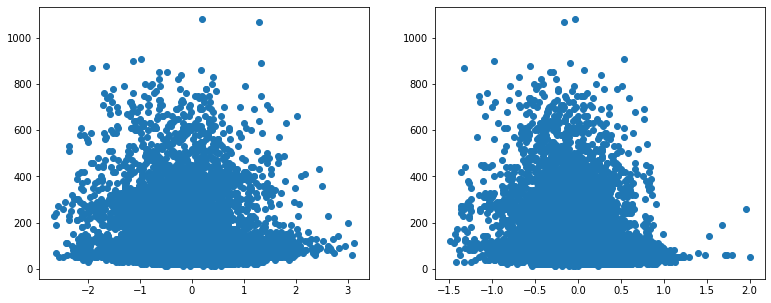

In [60]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
for i, j in enumerate((6,8)):
  axes[i].scatter(energy_df[f'temp_pca{j}'], energy_df['Appliances'])

In [61]:
#Lets look at components of humid_pca4
dict(zip(temp_cols, pca.components_[7,:]))

{'temp_bath': -0.217328551591447,
 'temp_iron': -0.2402654099158847,
 'temp_kitchen': 0.625202091839311,
 'temp_laundry': -0.29689595991058676,
 'temp_living': -0.11736304703987943,
 'temp_office': -0.09845473026092974,
 'temp_parents': 0.602587432032222,
 'temp_teen': -0.17157195238503242}

# **PCA on humidity**

In [62]:
humid_cols = list(set(list(humid_dict.values())) - {'humid_outside', 'humid_station'})
energy_df['mean_humid'] = energy_df[temp_cols].mean(axis=1)
energy_df[['mean_humid', 'Appliances']].corr()

mean_humid  Appliances
mean_humid     1.00000     0.05474
Appliances     0.05474     1.00000

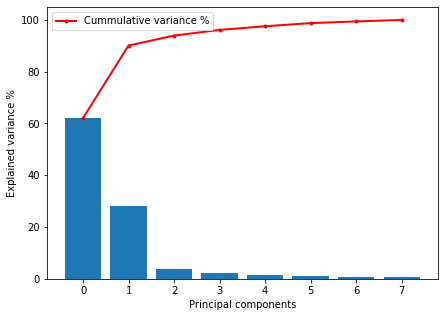

In [63]:
pca = PCA()
pca.fit(train_energy_df[humid_cols])
humid_pca = pca.transform(energy_df[humid_cols])
variance = pca.explained_variance_ratio_*100
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.bar(range(len(variance)), variance)
ax.plot(range(len(variance)), np.cumsum(variance),'r.-',linewidth=2, label='Cummulative variance %')
ax.set_xlabel('Principal components')
ax.set_ylabel('Explained variance %')
plt.legend(loc='best')

In [64]:
variance

array([62.09137315, 28.02035975,  3.84761759,  2.19313449,  1.40502588,
        1.22143306,  0.64956943,  0.57148664])

In [65]:
for i in range(humid_pca.shape[1]):
  energy_df[f'humid_pca{i+1}'] = humid_pca[:,i]

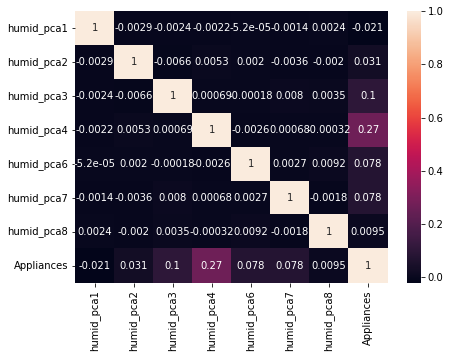

In [66]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
sns.heatmap(energy_df[['humid_pca1', 'humid_pca2', 'humid_pca3', 'humid_pca4', 'humid_pca6', 'humid_pca7', 'humid_pca8', 'Appliances']].corr(), ax = ax, annot=True)


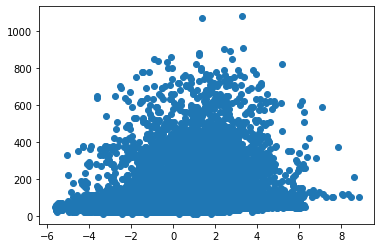

In [67]:
plt.scatter(energy_df['humid_pca4'], energy_df['Appliances'])

In [68]:
#Lets look at components of humid_pca4
dict(zip(humid_cols, pca.components_[3,:]))

{'humid_bath': -0.0050523524572136935,
 'humid_iron': 0.07897694512980472,
 'humid_kitchen': 0.4123122284268896,
 'humid_laundry': 0.29088037088150875,
 'humid_living': -0.539578523176146,
 'humid_office': 0.4102126219725878,
 'humid_parents': -0.01890427923705923,
 'humid_teen': -0.5285334448509874}

In [69]:
energy_df['diff_temp'] = energy_df['temp_outside'] - energy_df['mean_temp']
energy_df[['diff_temp', 'Appliances']].corr()

diff_temp  Appliances
diff_temp     1.00000     0.12411
Appliances    0.12411     1.00000

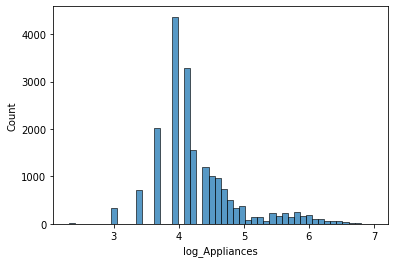

In [70]:
energy_df['log_Appliances'] = np.log(energy_df['Appliances'])
sns.histplot(energy_df.log_Appliances,bins=50)

# **Modeling with PCA features**

In [71]:
final_features = ['temp_pca1', 'temp_pca2', 'humid_pca1', 'humid_pca2', 'temp_outside', 'humid_outside', 'weekday', 'Windspeed', 'Press_mm_hg', 'log_Appliances']


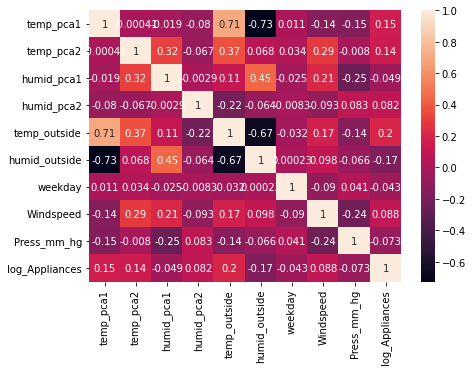

In [72]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
sns.heatmap(energy_df[final_features].corr(), ax = ax, annot=True)

In [73]:
final_train_df, final_test_df = train_test_split(energy_df[final_features], test_size = 0.2, random_state = 1)

In [74]:
X_train, y_train = final_train_df.drop('log_Appliances', axis=1), final_train_df['log_Appliances']
X_test, y_test = final_test_df.drop('log_Appliances', axis=1), final_test_df['log_Appliances']

In [75]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [76]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape([-1,1])).flatten()
y_test = sc_y.transform(y_test.values.reshape([-1,1])).flatten()

The ML regressor models that we use are :

Lasso Regressor
Ridge Regressor
KNeighbors Regressor
Support Vector Regressor
Random Forest Regressor
Extra Tree Regressor
Gradient Boosting Regressor
XGB Regressor
MLP Regressor

In [80]:
from sklearn import linear_model

In [81]:
models = [ 
           ['LinearRegression', linear_model.LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [82]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[13:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [83]:
results_df = pd.DataFrame(model_data)

In [84]:
results_df

Name  Train_Time  ...  Test_R2_Score  Test_RMSE_Score
0             LinearRegression    0.014529  ...       0.080336         0.982551
1                      Lasso:     0.004855  ...      -0.000805         1.024980
2                      Ridge:     0.003632  ...       0.080335         0.982552
3        KNeighborsRegressor:     0.033692  ...       0.637311         0.617032
4                         SVR:   16.528265  ...       0.280509         0.869067
5                RandomForest    12.689792  ...       0.701298         0.559964
6         ExtraTreeRegressor :    4.157647  ...       0.752727         0.509483
7  GradientBoostingRegressor:     4.220489  ...       0.244582         0.890501
8               XGBRegressor:     1.166047  ...       0.245427         0.890002
9               MLPRegressor:    11.427792  ...       0.374358         0.810408

[10 rows x 5 columns]

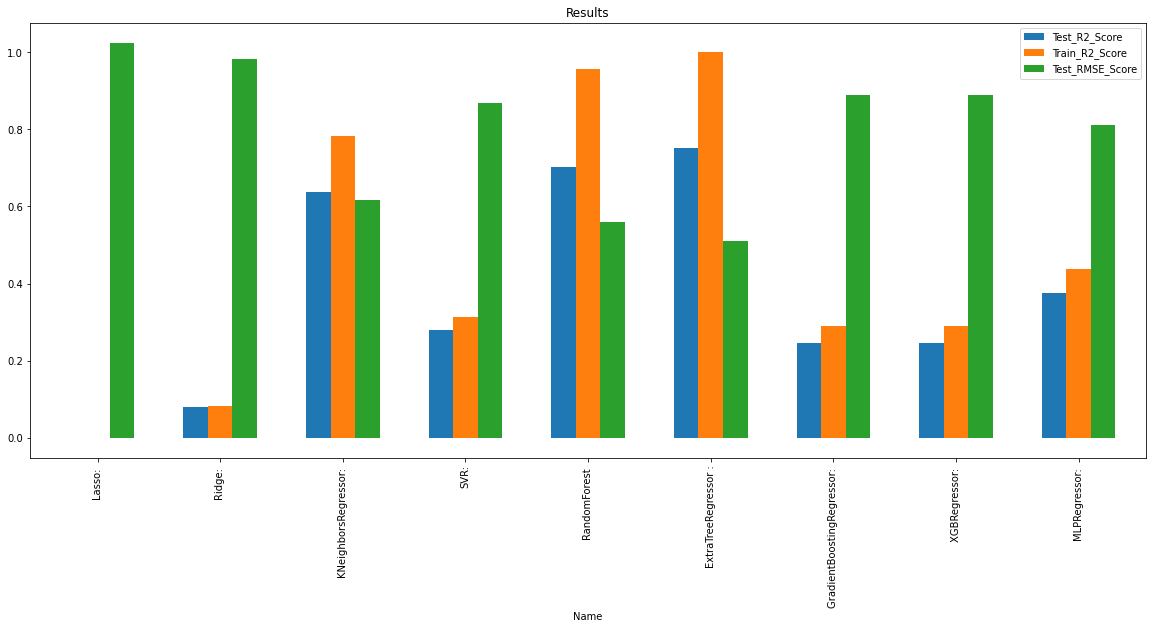

In [ ]:
results_df.plot.bar(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], title = 'Results' , width = .6, figsize= (20,8))

OBSERVATIONS :

*   Extra Tree Regressor performs the best so far with a R2 score of 0.59 and RMSE of 0.65.
*   Lasso regression is the worst performing model so far.



# **Hyper-parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 250}

In [ ]:
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, n_estimators=250, random_state=40)

In [ ]:
grid_search.best_estimator_.score(X_train,y_train)

1.0

In [ ]:
grid_search.best_estimator_.score(X_test,y_test)

0.7521026606954533

In [ ]:
np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)))

0.5101249626767994

We observe a minute improvement in R2 score and RMSE score after hyper parameter tuning of Extra Trees Regressor.

In [ ]:
errors = []
errors.append(np.sqrt(mean_squared_error(y_test[y_test*sc_y.scale_ + sc_y.mean_ < 300]*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test[y_test*sc_y.scale_ + sc_y.mean_ < 300,:])*sc_y.scale_ + sc_y.mean_)))


In [ ]:
errors.append(np.sqrt(mean_squared_error(y_test[y_test*sc_y.scale_ + sc_y.mean_ > 300]*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test[y_test*sc_y.scale_ + sc_y.mean_ > 300,:])*sc_y.scale_ + sc_y.mean_)))


ValueError: ignored

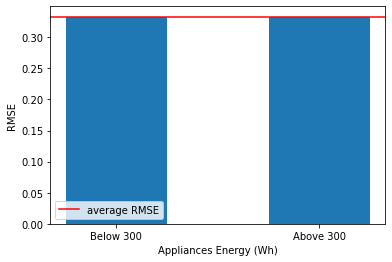

In [ ]:
plt.bar(x=['Below 300', 'Above 300'], height=errors, width = 0.5)
plt.axhline(np.sqrt(mean_squared_error(y_test*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test)*sc_y.scale_ + sc_y.mean_)), color='red', label='average RMSE')
plt.xlabel('Appliances Energy (Wh)')
plt.ylabel('RMSE')
plt.legend(loc='best')

In [ ]:
X_test = pd.DataFrame(X_test, columns=final_features[:-1])
y_test = pd.Series(y_test, name = 'log_Appliances')

In [ ]:
session_errors = []
for i in range(1,4):
  session_errors.append(np.sqrt(mean_squared_error(y_test[X_test.session*sc_X.scale_[-3] + sc_X.mean_[-3] == i]*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test[X_test.session*sc_X.scale_[-3] + sc_X.mean_[-3] == i])*sc_y.scale_ + sc_y.mean_)))


AttributeError: ignored

ValueError: ignored

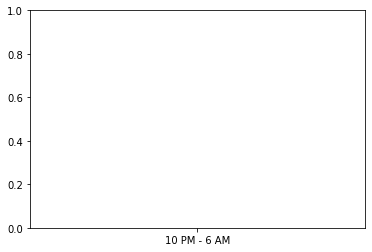

In [ ]:
plt.bar(x=['10 PM - 6 AM', '6 AM - 3 PM', '3 PM - 10 PM'], height=session_errors, width = 0.5)
plt.axhline(np.sqrt(mean_squared_error(y_test*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test)*sc_y.scale_ + sc_y.mean_)), color='red', label='average RMSE')
plt.xlabel('Appliances Energy (Wh)')
plt.ylabel('RMSE')
plt.legend(loc='best')

Text(0.5, 0, 'Samples')

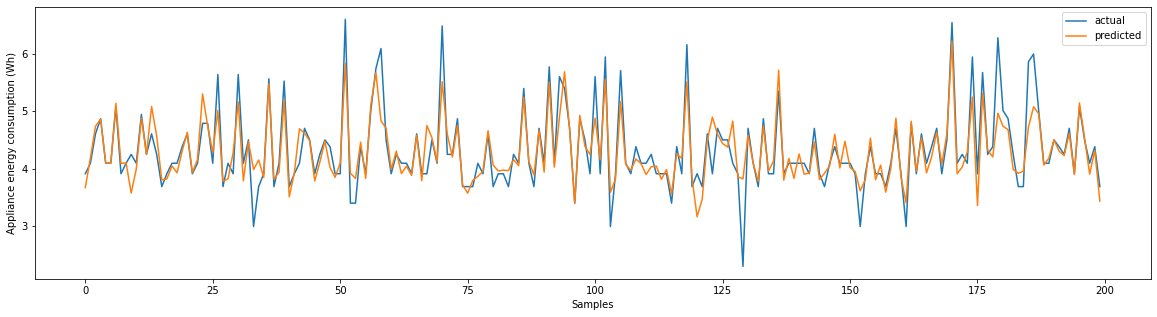

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(20,5))
plt.plot(range(len(y_test[:200])), y_test[:200]*sc_y.scale_ + sc_y.mean_, label='actual')
plt.plot(range(len(y_test[:200])), grid_search.best_estimator_.predict(X_test.iloc[:200,:])*sc_y.scale_ + sc_y.mean_, label='predicted')
plt.legend(loc='best')
plt.ylabel('Appliance energy consumption (Wh)')
plt.xlabel('Samples')

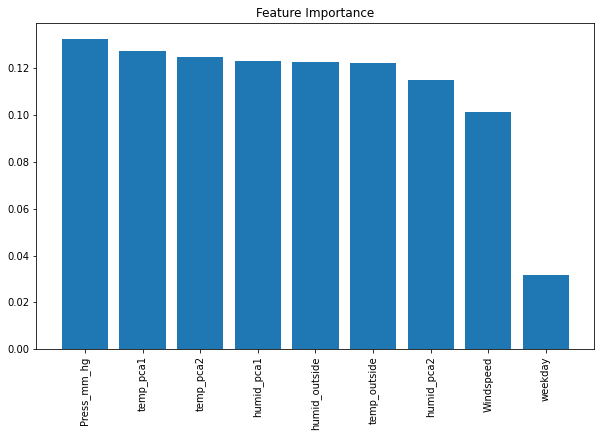

In [ ]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [final_train_df.columns[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

# **Looking at the feature importances, it is clear that the PCA features of temperature and humidity hold slightly higher feature importances compared to others. However almost all the features used for modelling hold equal importance**

# **Modeling Without PCA features**

### **Including all temperature and humidity features and engineered feature 'session' in our features set.**

In [ ]:
final_features = ['temp_laundry','temp_bath', 'temp_kitchen', 'temp_parents', 'temp_office', 'temp_living', 'temp_teen', 'temp_iron','humid_kitchen',
 'humid_office', 'humid_bath', 'humid_living', 'humid_parents', 'humid_laundry', 'humid_teen', 'humid_iron',
  'temp_outside', 'humid_outside', 'temp_station', 'humid_station', 'weekday', 'Windspeed', 'Press_mm_hg', 'log_Appliances']

In [ ]:
final_train_df, final_test_df = train_test_split(energy_df[final_features], test_size = 0.2, random_state = 1)

In [ ]:
X_train, y_train = final_train_df.drop('log_Appliances', axis=1), final_train_df['log_Appliances']
X_test, y_test = final_test_df.drop('log_Appliances', axis=1), final_test_df['log_Appliances']

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape([-1,1])).flatten()
y_test = sc_y.transform(y_test.values.reshape([-1,1])).flatten()

In [ ]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()],
           ['XGBRegressor: ', xgb.XGBRegressor()],
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[03:50:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results_df = pd.DataFrame(model_data)

In [ ]:
results_df

Name  Train_Time  ...  Test_R2_Score  Test_RMSE_Score
0                      Lasso:     0.008610  ...      -0.000805         1.024980
1                      Ridge:     0.010728  ...       0.239866         0.893276
2        KNeighborsRegressor:     0.000790  ...       0.652559         0.603922
3                         SVR:   17.844850  ...       0.448573         0.760825
4                RandomForest    31.165777  ...       0.717072         0.544978
5         ExtraTreeRegressor :    8.818100  ...       0.758430         0.503572
6  GradientBoostingRegressor:     8.376014  ...       0.352203         0.824632
7               XGBRegressor:     1.731477  ...       0.354139         0.823399
8               MLPRegressor:    10.134959  ...       0.529928         0.702462

[9 rows x 5 columns]

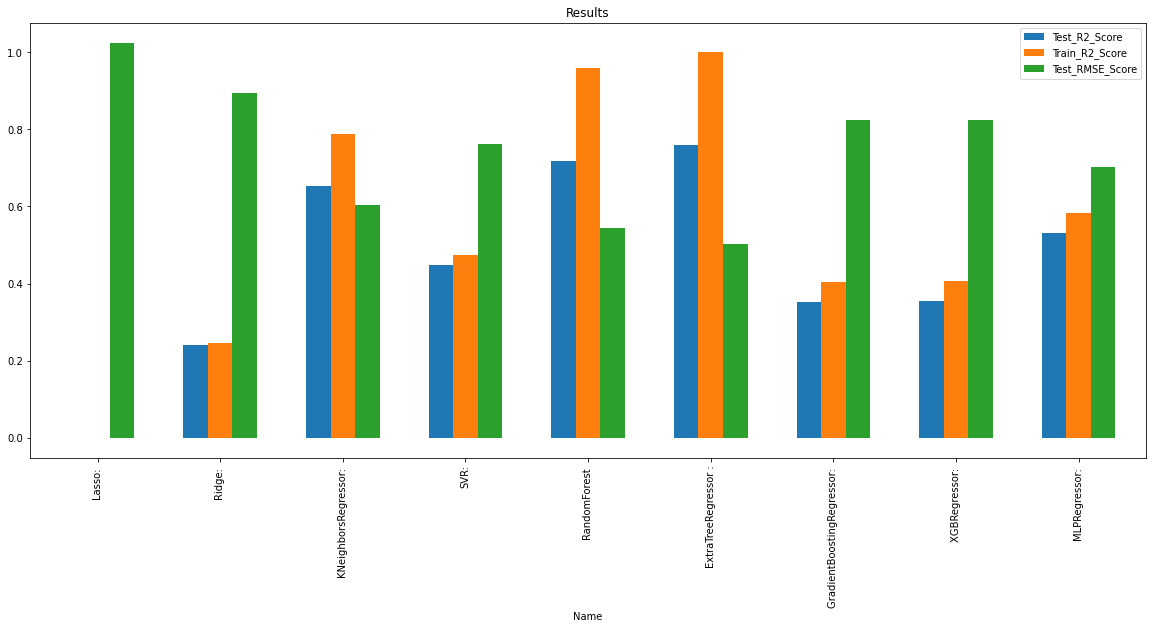

In [ ]:
results_df.plot.bar(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], title = 'Results' , width = .6, figsize= (20,8))

**The model results are almost similar to that observed in models trained with PCA feature set.**

# **Hyper-parameter Tuning**

In [ ]:
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 150}

In [ ]:
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=150,
                    random_state=40)

In [ ]:
grid_search.best_estimator_.score(X_train,y_train)

1.0

In [ ]:
grid_search.best_estimator_.score(X_test,y_test)

0.7582680337328004

In [ ]:
np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)))

0.5037414472758328

In [ ]:
errors = []
errors.append(np.sqrt(mean_squared_error(y_test[y_test*sc_y.scale_ + sc_y.mean_ < 300]*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test[y_test*sc_y.scale_ + sc_y.mean_ < 300,:])*sc_y.scale_ + sc_y.mean_)))


In [ ]:
errors.append(np.sqrt(mean_squared_error(y_test[y_test*sc_y.scale_ + sc_y.mean_ > 300]*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test[y_test*sc_y.scale_ + sc_y.mean_ > 300,:])*sc_y.scale_ + sc_y.mean_)))


ValueError: ignored

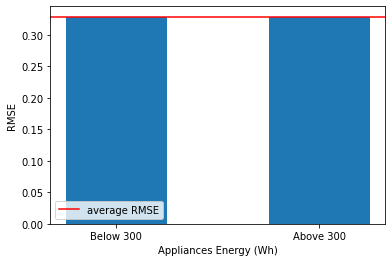

In [ ]:
plt.bar(x=['Below 300', 'Above 300'], height=errors, width = 0.5)
plt.axhline(np.sqrt(mean_squared_error(y_test*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test)*sc_y.scale_ + sc_y.mean_)), color='red', label='average RMSE')
plt.xlabel('Appliances Energy (Wh)')
plt.ylabel('RMSE')
plt.legend(loc='best')

**The model seems to make more errors in predicting the ones where actual energy consumption levels of appliances is quite high (above 300 Wh). While below 300 Wh, the RMSE is below the average RMS of entire test set.**

In [ ]:
X_test = pd.DataFrame(X_test, columns=final_features[:-1])
y_test = pd.Series(y_test, name = 'log_Appliances')

In [ ]:
session_errors = []
for i in range(1,4):
    session_errors.append(np.sqrt(mean_squared_error(y_test[X_test.session*sc_X.scale_[-3] + sc_X.mean_[-3] == i]*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test[X_test.session*sc_X.scale_[-3] + sc_X.mean_[-3] == i])*sc_y.scale_ + sc_y.mean_)))


AttributeError: ignored

ValueError: ignored

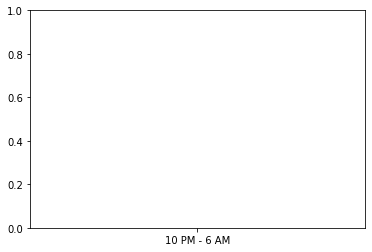

In [ ]:
plt.bar(x=['10 PM - 6 AM', '6 AM - 3 PM', '3 PM - 10 PM'], height=session_errors, width = 0.5)
plt.axhline(np.sqrt(mean_squared_error(y_test*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test)*sc_y.scale_ + sc_y.mean_)), color='red', label='average RMSE')
plt.xlabel('Session (Time of the day)')
plt.ylabel('RMSE')
plt.legend(loc='best')

**When we look at the root mean squared errors made in prediction of energy consumption in appliances at different time of the day, we observe that errors made are quite less than the average RMSE of entire test set. Which is quite intuitive since we had little to no variance in energy consumption in those hours. However the errors are above average for other two time frames, where we had seen a quite a variance in energy levels.**

Text(0.5, 0, 'Samples')

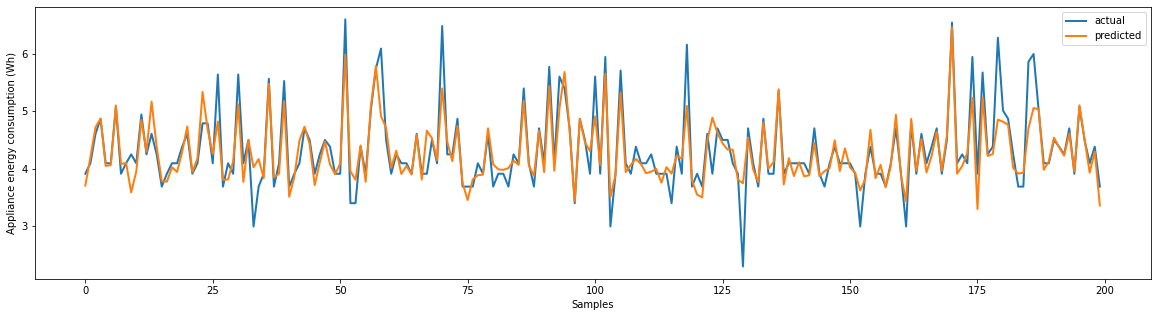

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(20,5))
plt.plot(range(len(y_test[:200])), y_test[:200]*sc_y.scale_ + sc_y.mean_, label='actual',linewidth=2)
plt.plot(range(len(y_test[:200])), grid_search.best_estimator_.predict(X_test.iloc[:200,:])*sc_y.scale_ + sc_y.mean_, label='predicted',linewidth=2)
plt.legend(loc='best')
plt.ylabel('Appliance energy consumption (Wh)')
plt.xlabel('Samples')

**The above figure represents actual and predicted values of 200 samples in test set.**

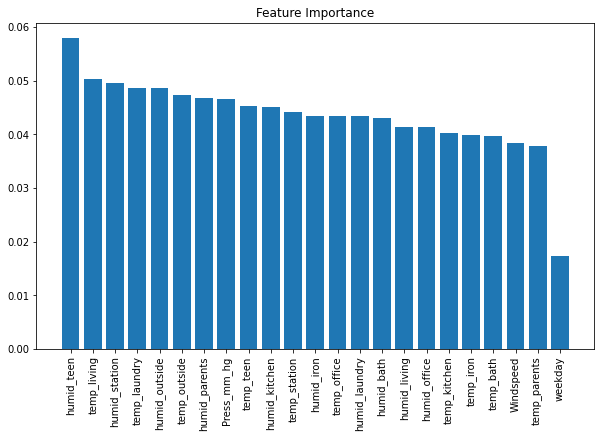

In [ ]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [final_train_df.columns[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

In the case where we don't include any PCA features, the engineered feature 'humid_teen' seems to hold most importance among all the features.